In [2]:
%matplotlib inline

# Imports

In [3]:
import pandas as pd
import numpy as np

from datetime import *

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10,4)})

# Load Data

In [5]:
# reviews datframe
df_revs = pd.read_csv("../data/output/agences_reviews_20220414.csv",sep = ";", encoding = "utf-8")
df_revs

author_name  user_rating  \
0                  imane mb            5   
1      Kevina Lopes Martins            1   
2               Abdel Yezli            5   
3             Kinane Djebli            1   
4        Chrisley Princivil            1   
...                     ...          ...   
26113            Abel Rocha            1   
26114         Cedric BERGER            5   
26115         Angie Madison            2   
26116          Martin Héros            2   
26117       Laurine Lavocat            5   

                                                    text review_date  \
0      Mon conseiller de Colombes  (je ne me souviens...  2022-02-16   
1      Un manque de professionnalisme flagrant !!\nPe...  2022-02-12   
2      Mme Labed est une super directrice à l'écoute....  2022-01-16   
3      0 professionnalisme ! Une banque à fuir. Domma...  2021-11-27   
4      Si j’avais pu mettre 0 je l’aurais fait. Une a...  2022-02-11   
...                                                  ...         ...   
26113  A fuir absolument a se demander si les magouil...  2020-12-22   
26114  Petite par la taille mais grande par l efficac...  2021-07-01   
26115  Conseillère certes a l'heure mais n'a pas prép...  2019-05-30   
26116  Conseil trop succinct.\nLa gentillesse ne fait...  2020-07-03   
26117  Conseillère à l’écoute très gentille je recomm...  2022-04-14   

                          place_id  \
0      ChIJKyi768Zl5kcRxMYLyp4CB0k   
1      ChIJKyi768Zl5kcRxMYLyp4CB0k   
2      ChIJKyi768Zl5kcRxMYLyp4CB0k   
3      ChIJKyi768Zl5kcRxMYLyp4CB0k   
4      ChIJKyi768Zl5kcRxMYLyp4CB0k   
...                            ...   
26113  ChIJVT8J2MqJUw0RZ87ztLpove4   
26114  ChIJx4b94Vqa9UcRs9d4ZDJchmM   
26115  ChIJRVA6MramFkgRQFxyN3roDvY   
26116  ChIJ1zyqqT8RB0gRu-8sG7ipxxU   
26117  ChIJ33XvJuxr8UcRw3zONWEkHlQ   

                                                 address       phone_number  \
0       1 Pl. du Général Leclerc, 92700 Colombes, France  +33 1 71 09 61 03   
1       1 Pl. du Général Leclerc, 92700 Colombes, France  +33 1 71 09 61 03   
2       1 Pl. du Général Leclerc, 92700 Colombes, France  +33 1 71 09 61 03   
3       1 Pl. du Général Leclerc, 92700 Colombes, France  +33 1 71 09 61 03   
4       1 Pl. du Général Leclerc, 92700 Colombes, France  +33 1 71 09 61 03   
...                                                  ...                ...   
26113           5 Av. de Bordeaux, 40200 Mimizan, France  +33 5 58 04 42 80   
26114        13 Rue de Saint-Agrève, 43190 Tence, France  +33 4 71 59 53 98   
26115       2 Pl. de l'Auditoire, 29870 Lannilis, France  +33 2 57 29 04 84   
26116         6 Rue de l'Anjou, 79130 Secondigny, France  +33 5 17 43 60 61   
26117  21 Pl. de la République, 03290 Dompierre-sur-B...  +33 4 70 46 96 80   

                                                 website  
0      https://www.agences.caisse-epargne.fr/banque-a...  
1      https://www.agences.caisse-epargne.fr/banque-a...  
2      https://www.agences.caisse-epargne.fr/banque-a...  
3      https://www.agences.caisse-epargne.fr/banque-a...  
4      https://www.agences.caisse-epargne.fr/banque-a...  
...                                                  ...  
26113              https://www.bpaca.banquepopulaire.fr/  
26114  https://www.agences.caisse-epargne.fr/banque-a...  
26115  https://www.agences.caisse-epargne.fr/banque-a...  
26116  https://www.agences.caisse-epargne.fr/banque-a...  
26117  https://agences.banquepopulaire.fr/banque-assu...  

[26118 rows x 8 columns]

In [6]:
#agences ids dataframe
df_ids = pd.read_csv("../data/output/agences_ids_20220414.csv",sep = ";", encoding = "utf-8")
df_ids

code_etab                                  nom_etab code_agence  \
0         17515                             ILE DE FRANCE          59   
1         17515                             ILE DE FRANCE          15   
2         17515                             ILE DE FRANCE          73   
3         17515                             ILE DE FRANCE          12   
4         11315              PROVENCE ALPES CORSE REUNION         123   
...         ...                                       ...         ...   
6232      18707            Banque Populaire Val de France       00789   
6233      16807     Banque Populaire Auvergne Rhône Alpes       00311   
6234      17807                 Banque Populaire Occitane       00654   
6235      10807  Banque Populaire Bourgogne Franche-Comté       00457   
6236      11315              PROVENCE ALPES CORSE REUNION          61   

                             nom_agence                          rue  \
0                              COLOMBES  1, PLACE DU GÉNÉRAL LECLERC   
1                       PARIS DAUMESNIL        19, PLACE FÉLIX EBOUÉ   
2                               PUTEAUX       51 RUE RICHARD WALLACE   
3                      PARIS RÉPUBLIQUE       134, AVENUE PARMENTIER   
4                      ESTRANGIN PASTRE       PLACE ESTRANGIN PASTRE   
...                                 ...                          ...   
6232  LA CHAUSSEE ST VICTOR ENTREPRISES              7, rue Copernic   
6233                         YSSINGEAUX    2, ave Georges Clemenceau   
6234                    ALBI UNIVERSITE            83, ave de Gaulle   
6235                         LA MACHINE     25, ave de la République   
6236     CENTRE D'AFFAIRES CORSE DU SUD    LES JARDINS DE BODICCIONE   

            nom_banque                     place_id  rating  \
0     Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9   
1     Caisse d'Epargne  ChIJDwV8Mmly5kcRaAgerdb1oHc     2.6   
2     Caisse d'Epargne  ChIJ4ccoHR9l5kcRrL0xMpzyy0E     3.0   
3     Caisse d'Epargne  ChIJcZkho-Nt5kcR_9GaoOv4heE     2.9   
4     Caisse d'Epargne  ChIJRfBL_LnAyRIRKsLr-97nLJ4     2.2   
...                ...                          ...     ...   
6232  Banque Populaire  ChIJFbLwQ-qn5EcRBOd525AFrUc     0.0   
6233  Banque Populaire  ChIJHWa8BGeT9UcRSARlgs69Ytk     0.0   
6234  Banque Populaire  ChIJ9_IvjFPdrRIRoHsE6fI2uNw     0.0   
6235  Banque Populaire  ChIJNbI6_p-v8UcRIeoETw6oh-g     0.0   
6236  Caisse d'Epargne  ChIJ3VdrI3Bp2hIRYvAp5WeN6y0     0.0   

      user_ratings_total               lat_lng  
0                  143.0  48.9222280,2.2524041  
1                  110.0  48.8393186,2.3969837  
2                   99.0  48.8807443,2.2375647  
3                   99.0  48.8688381,2.3721251  
4                   98.0  43.2902160,5.3776134  
...                  ...                   ...  
6232                 0.0  47.6150123,1.3476472  
6233                 0.0  45.1436389,4.1231388  
6234                 0.0  43.9203094,2.1397661  
6235                 0.0  46.8893806,3.4648470  
6236                 0.0  41.9347411,8.7452745  

[6237 rows x 10 columns]

In [7]:
#merge both dataframes 
df = pd.merge(left = df_ids, right = df_revs, how = 'left', on = 'place_id')
df

code_etab                                  nom_etab code_agence  \
0          17515                             ILE DE FRANCE          59   
1          17515                             ILE DE FRANCE          59   
2          17515                             ILE DE FRANCE          59   
3          17515                             ILE DE FRANCE          59   
4          17515                             ILE DE FRANCE          59   
...          ...                                       ...         ...   
26467      18707            Banque Populaire Val de France       00789   
26468      16807     Banque Populaire Auvergne Rhône Alpes       00311   
26469      17807                 Banque Populaire Occitane       00654   
26470      10807  Banque Populaire Bourgogne Franche-Comté       00457   
26471      11315              PROVENCE ALPES CORSE REUNION          61   

                              nom_agence                          rue  \
0                               COLOMBES  1, PLACE DU GÉNÉRAL LECLERC   
1                               COLOMBES  1, PLACE DU GÉNÉRAL LECLERC   
2                               COLOMBES  1, PLACE DU GÉNÉRAL LECLERC   
3                               COLOMBES  1, PLACE DU GÉNÉRAL LECLERC   
4                               COLOMBES  1, PLACE DU GÉNÉRAL LECLERC   
...                                  ...                          ...   
26467  LA CHAUSSEE ST VICTOR ENTREPRISES              7, rue Copernic   
26468                         YSSINGEAUX    2, ave Georges Clemenceau   
26469                    ALBI UNIVERSITE            83, ave de Gaulle   
26470                         LA MACHINE     25, ave de la République   
26471     CENTRE D'AFFAIRES CORSE DU SUD    LES JARDINS DE BODICCIONE   

             nom_banque                     place_id  rating  \
0      Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9   
1      Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9   
2      Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9   
3      Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9   
4      Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9   
...                 ...                          ...     ...   
26467  Banque Populaire  ChIJFbLwQ-qn5EcRBOd525AFrUc     0.0   
26468  Banque Populaire  ChIJHWa8BGeT9UcRSARlgs69Ytk     0.0   
26469  Banque Populaire  ChIJ9_IvjFPdrRIRoHsE6fI2uNw     0.0   
26470  Banque Populaire  ChIJNbI6_p-v8UcRIeoETw6oh-g     0.0   
26471  Caisse d'Epargne  ChIJ3VdrI3Bp2hIRYvAp5WeN6y0     0.0   

       user_ratings_total               lat_lng           author_name  \
0                   143.0  48.9222280,2.2524041              imane mb   
1                   143.0  48.9222280,2.2524041  Kevina Lopes Martins   
2                   143.0  48.9222280,2.2524041           Abdel Yezli   
3                   143.0  48.9222280,2.2524041         Kinane Djebli   
4                   143.0  48.9222280,2.2524041    Chrisley Princivil   
...                   ...                   ...                   ...   
26467                 0.0  47.6150123,1.3476472                   NaN   
26468                 0.0  45.1436389,4.1231388                   NaN   
26469                 0.0  43.9203094,2.1397661                   NaN   
26470                 0.0  46.8893806,3.4648470                   NaN   
26471                 0.0  41.9347411,8.7452745                   NaN   

       user_rating                                               text  \
0              5.0  Mon conseiller de Colombes  (je ne me souviens...   
1              1.0  Un manque de professionnalisme flagrant !!\nPe...   
2              5.0  Mme Labed est une super directrice à l'écoute....   
3              1.0  0 professionnalisme ! Une banque à fuir. Domma...   
4              1.0  Si j’avais pu mettre 0 je l’aurais fait. Une a...   
...            ...                                                ...   
26467          NaN                                                NaN   
26468      

In [5]:
df.head()

code_etab       nom_etab code_agence nom_agence  \
0      17515  ILE DE FRANCE          59   COLOMBES   
1      17515  ILE DE FRANCE          59   COLOMBES   
2      17515  ILE DE FRANCE          59   COLOMBES   
3      17515  ILE DE FRANCE          59   COLOMBES   
4      17515  ILE DE FRANCE          59   COLOMBES   

                           rue        nom_banque                     place_id  \
0  1, PLACE DU GÉNÉRAL LECLERC  Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k   
1  1, PLACE DU GÉNÉRAL LECLERC  Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k   
2  1, PLACE DU GÉNÉRAL LECLERC  Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k   
3  1, PLACE DU GÉNÉRAL LECLERC  Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k   
4  1, PLACE DU GÉNÉRAL LECLERC  Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k   

   rating  user_ratings_total               lat_lng           author_name  \
0     1.9               143.0  48.9222280,2.2524041              imane mb   
1     1.9               143.0  48.9222280,2.2524041  Kevina Lopes Martins   
2     1.9               143.0  48.9222280,2.2524041           Abdel Yezli   
3     1.9               143.0  48.9222280,2.2524041         Kinane Djebli   
4     1.9               143.0  48.9222280,2.2524041    Chrisley Princivil   

   user_rating                                               text review_date  \
0          5.0  Mon conseiller de Colombes  (je ne me souviens...  2022-02-16   
1          1.0  Un manque de professionnalisme flagrant !!\nPe...  2022-02-12   
2          5.0  Mme Labed est une super directrice à l'écoute....  2022-01-16   
3          1.0  0 professionnalisme ! Une banque à fuir. Domma...  2021-11-27   
4          1.0  Si j’avais pu mettre 0 je l’aurais fait. Une a...  2022-02-11   

                                            address       phone_number  \
0  1 Pl. du Général Leclerc, 92700 Colombes, France  +33 1 71 09 61 03   
1  1 Pl. du Général Leclerc, 92700 Colombes, France  +33 1 71 09 61 03   
2  1 Pl. du Général Leclerc, 92700 Colombes, France  +33 1 71 09 61 03   
3  1 Pl. du Général Leclerc, 92700 Colombes, France  +33 1 71 09 61 03   
4  1 Pl. du Général Leclerc, 92700 Colombes, France  +33 1 71 09 61 03   

                                             website  
0  https://www.agences.caisse-epargne.fr/banque-a...  
1  https://www.agences.caisse-epargne.fr/banque-a...  
2  https://www.agences.caisse-epargne.fr/banque-a...  
3  https://www.agences.caisse-epargne.fr/banque-a...  
4  https://www.agences.caisse-epargne.fr/banque-a...

In [6]:
df.shape

(26473, 17)

In [51]:
df.isnull().sum()

code_etab                0
nom_etab                 0
code_agence              0
nom_agence               0
rue                      0
nom_banque               0
place_id                 0
rating                   0
user_ratings_total       0
lat_lng                  0
author_name            355
user_rating            355
text                  3958
review_date            355
address                355
phone_number           397
website                357
dtype: int64

# Analyses statistiques

In [8]:
df_1 = df_ids.copy()
df_1

code_etab                                  nom_etab code_agence  \
0         17515                             ILE DE FRANCE          59   
1         17515                             ILE DE FRANCE          15   
2         17515                             ILE DE FRANCE          73   
3         17515                             ILE DE FRANCE          12   
4         11315              PROVENCE ALPES CORSE REUNION         123   
...         ...                                       ...         ...   
6232      18707            Banque Populaire Val de France       00789   
6233      16807     Banque Populaire Auvergne Rhône Alpes       00311   
6234      17807                 Banque Populaire Occitane       00654   
6235      10807  Banque Populaire Bourgogne Franche-Comté       00457   
6236      11315              PROVENCE ALPES CORSE REUNION          61   

                             nom_agence                          rue  \
0                              COLOMBES  1, PLACE DU GÉNÉRAL LECLERC   
1                       PARIS DAUMESNIL        19, PLACE FÉLIX EBOUÉ   
2                               PUTEAUX       51 RUE RICHARD WALLACE   
3                      PARIS RÉPUBLIQUE       134, AVENUE PARMENTIER   
4                      ESTRANGIN PASTRE       PLACE ESTRANGIN PASTRE   
...                                 ...                          ...   
6232  LA CHAUSSEE ST VICTOR ENTREPRISES              7, rue Copernic   
6233                         YSSINGEAUX    2, ave Georges Clemenceau   
6234                    ALBI UNIVERSITE            83, ave de Gaulle   
6235                         LA MACHINE     25, ave de la République   
6236     CENTRE D'AFFAIRES CORSE DU SUD    LES JARDINS DE BODICCIONE   

            nom_banque                     place_id  rating  \
0     Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9   
1     Caisse d'Epargne  ChIJDwV8Mmly5kcRaAgerdb1oHc     2.6   
2     Caisse d'Epargne  ChIJ4ccoHR9l5kcRrL0xMpzyy0E     3.0   
3     Caisse d'Epargne  ChIJcZkho-Nt5kcR_9GaoOv4heE     2.9   
4     Caisse d'Epargne  ChIJRfBL_LnAyRIRKsLr-97nLJ4     2.2   
...                ...                          ...     ...   
6232  Banque Populaire  ChIJFbLwQ-qn5EcRBOd525AFrUc     0.0   
6233  Banque Populaire  ChIJHWa8BGeT9UcRSARlgs69Ytk     0.0   
6234  Banque Populaire  ChIJ9_IvjFPdrRIRoHsE6fI2uNw     0.0   
6235  Banque Populaire  ChIJNbI6_p-v8UcRIeoETw6oh-g     0.0   
6236  Caisse d'Epargne  ChIJ3VdrI3Bp2hIRYvAp5WeN6y0     0.0   

      user_ratings_total               lat_lng  
0                  143.0  48.9222280,2.2524041  
1                  110.0  48.8393186,2.3969837  
2                   99.0  48.8807443,2.2375647  
3                   99.0  48.8688381,2.3721251  
4                   98.0  43.2902160,5.3776134  
...                  ...                   ...  
6232                 0.0  47.6150123,1.3476472  
6233                 0.0  45.1436389,4.1231388  
6234                 0.0  43.9203094,2.1397661  
6235                 0.0  46.8893806,3.4648470  
6236                 0.0  41.9347411,8.7452745  

[6237 rows x 10 columns]

## Agences with 0 rating

In [81]:
# agences without rating as of 14/04/2022
df_wo = df_1[df_1["rating"]==0.0]
df_wo.shape

(355, 10)

### Percentage per bank

In [90]:
df_1.groupby(['nom_banque']).size()

nom_banque
Banque Populaire     2434
Banque de Savoie       45
Caisse d'Epargne     3698
Credit Cooperatif      61
dtype: int64

In [175]:
grouped = (100*df_wo.groupby(['nom_banque']).size()/df_1.groupby(['nom_banque']).size()).reset_index()
grouped_df = grouped.sort_values(0, ascending=False).rename(columns={0:'pourcentage%'})

In [176]:
grouped_df

nom_banque  pourcentage%
1   Banque de Savoie     22.222222
0   Banque Populaire      7.888250
2   Caisse d'Epargne      4.110330
3  Credit Cooperatif      1.639344

<AxesSubplot:xlabel='nom_banque', ylabel='pourcentage%'>

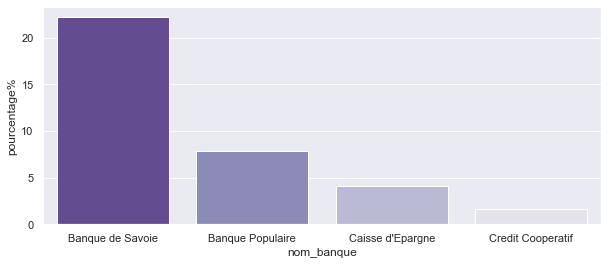

In [179]:
sns.barplot(x="nom_banque", y="pourcentage%", data=grouped_df, palette="Purples_r")

### Percentage per etab

In [94]:
df_wo.groupby(['nom_banque','nom_etab']).size()

nom_banque         nom_etab                                    
Banque Populaire   BRED-Banque Populaire                            5
                   Banque Populaire Alsace Lorraine Champagne       5
                   Banque Populaire Aquitaine Centre Atlantique    27
                   Banque Populaire Auvergne Rhône Alpes           24
                   Banque Populaire Bourgogne Franche-Comté        16
                   Banque Populaire Grand Ouest                    15
                   Banque Populaire Méditerranée                    6
                   Banque Populaire Occitane                       19
                   Banque Populaire Rives de Paris                  2
                   Banque Populaire Val de France                   6
                   Banque Populaire du Nord                         4
                   Banque Populaire du Sud                         14
                   CASDEN Banque Populaire                         49
Banque de Savoie   Banque 

In [182]:
grouped_raw = (100*df_wo.groupby(['nom_banque','nom_etab']).size()/\
               df_1.groupby(['nom_banque','nom_etab']).size()).reset_index()
grouped_ce = grouped_raw[grouped_raw["nom_banque"].str.contains("Caisse d'Epargne")]\
    .sort_values(0, ascending=False).rename(columns={0:'count'})
grouped_bpp = grouped_raw[grouped_raw["nom_banque"].str.contains("Banque Populaire")]\
    .sort_values(0, ascending=False).rename(columns={0:'count'})

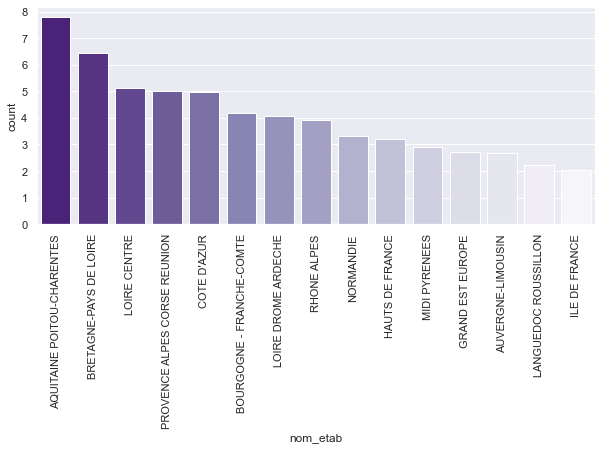

In [183]:
ax = sns.barplot(x="nom_etab", y="count", data=grouped_ce, palette="Purples_r")
ax.tick_params(axis='x', rotation=90)

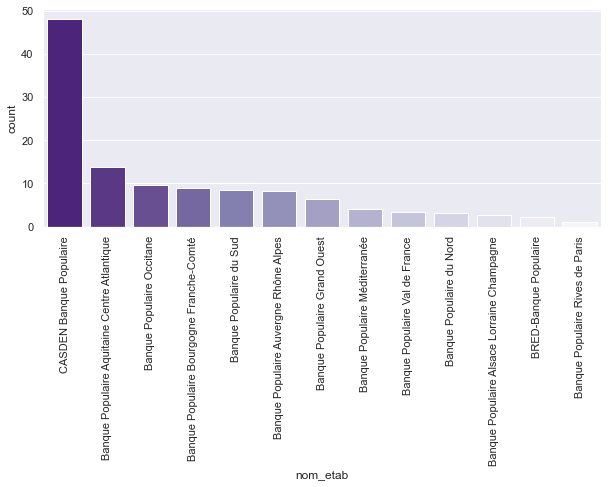

In [184]:
ax = sns.barplot(x="nom_etab", y="count", data=grouped_bpp, palette="Purples_r")
ax.tick_params(axis='x', rotation=90)

## Agences with ratings > 0

In [9]:
df_wi = df_1[df_1["rating"]!=0.0]
df_wi.shape

(5883, 10)

### Number of agences per bank

In [37]:
df_wi.groupby('nom_banque').size()

nom_banque
Banque Populaire     2242
Banque de Savoie       35
Caisse d'Epargne     3546
Credit Cooperatif      60
dtype: int64

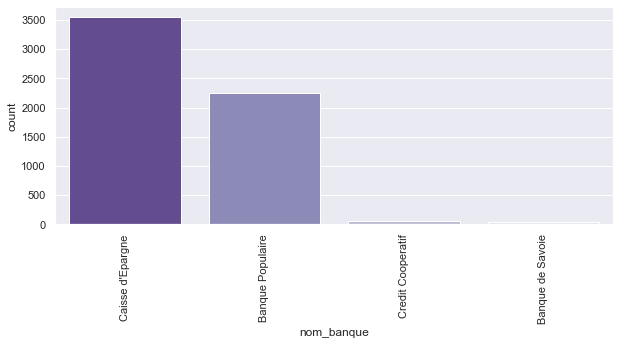

In [40]:
grouped = df_wi.groupby('nom_banque').size().reset_index()
grouped_df = grouped.sort_values(0, ascending=False).rename(columns={0:'count'})
ax = sns.barplot(x="nom_banque", y="count", data=grouped_df, palette = "Purples_r")
ax.tick_params(axis='x', rotation=90)

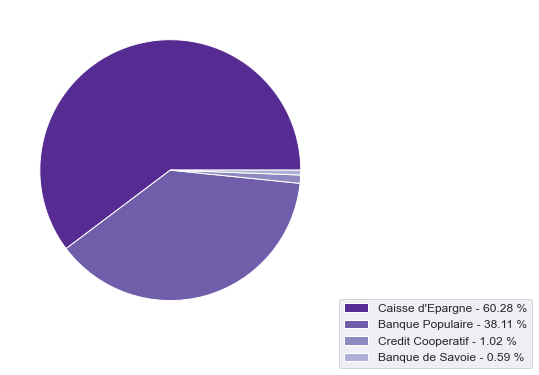

In [41]:
plt.subplots(figsize=(20,6))

patches, texts = plt.pie(grouped_df['count'],colors = sns.color_palette("Purples_r"))

porcent = 100.*grouped_df['count']/grouped_df['count'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(grouped_df['nom_banque'],porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, grouped_df['count']),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0),
           fontsize=12)
plt.show()

### Number of agences per etab

In [42]:
df_wi.groupby(['nom_banque','nom_etab']).size()

nom_banque         nom_etab                                    
Banque Populaire   BRED-Banque Populaire                           220
                   Banque Populaire Alsace Lorraine Champagne      187
                   Banque Populaire Aquitaine Centre Atlantique    167
                   Banque Populaire Auvergne Rhône Alpes           266
                   Banque Populaire Bourgogne Franche-Comté        163
                   Banque Populaire Grand Ouest                    224
                   Banque Populaire Méditerranée                   145
                   Banque Populaire Occitane                       178
                   Banque Populaire Rives de Paris                 197
                   Banque Populaire Val de France                  166
                   Banque Populaire du Nord                        127
                   Banque Populaire du Sud                         149
                   CASDEN Banque Populaire                          53
Banque de Sav

In [44]:
grouped_raw = df_wi.groupby(['nom_banque','nom_etab']).size().reset_index()
grouped_ce = grouped_raw[grouped_raw["nom_banque"].str.contains("Caisse d'Epargne")]\
    .sort_values(0, ascending=False).rename(columns={0:'count'})
grouped_bpp = grouped_raw[grouped_raw["nom_banque"].str.contains("Banque Populaire")]\
    .sort_values(0, ascending=False).rename(columns={0:'count'})

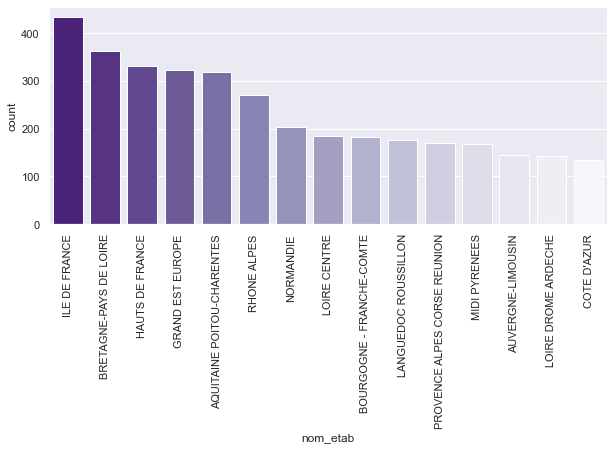

In [46]:
ax = sns.barplot(x="nom_etab", y='count', data=grouped_ce, palette = "Purples_r")
ax.tick_params(axis='x', rotation=90)

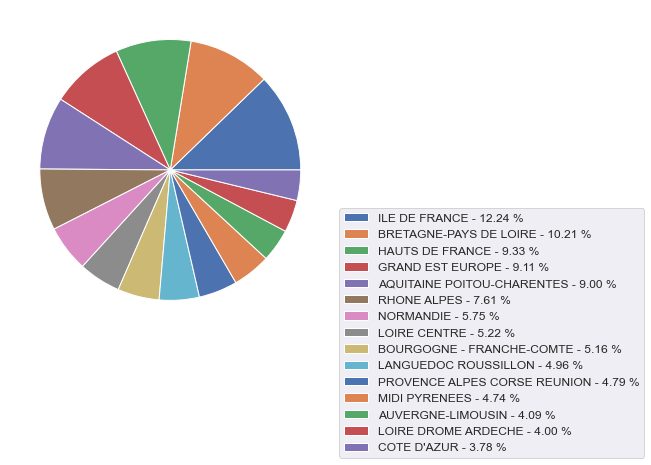

In [45]:
plt.subplots(figsize=(20,6))

patches, texts = plt.pie(grouped_ce['count'])

porcent = 100.*grouped_ce['count']/grouped_ce['count'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(grouped_ce['nom_etab'],porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, grouped_ce['count']),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0),
           fontsize=12)
plt.show()

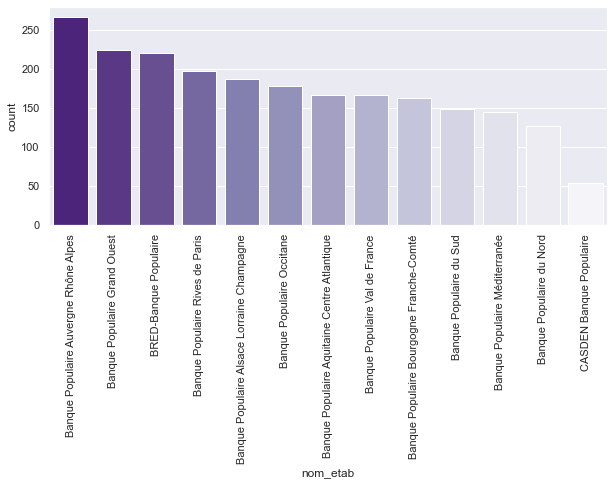

In [47]:
ax = sns.barplot(x="nom_etab", y='count', data=grouped_bpp, palette = "Purples_r")
ax.tick_params(axis='x', rotation=90)

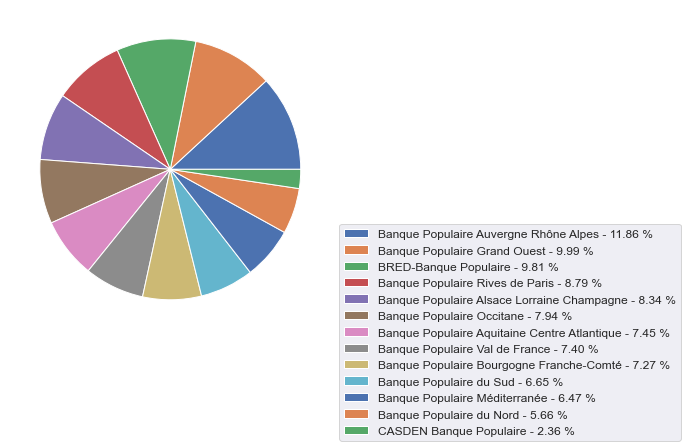

In [48]:
plt.subplots(figsize=(20,6))

patches, texts = plt.pie(grouped_bpp['count'])

porcent = 100.*grouped_bpp['count']/grouped_bpp['count'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(grouped_bpp['nom_etab'],porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, grouped_bpp['count']),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0),
           fontsize=12)
plt.show()

### Total ratings per bank

In [9]:
grouped = df_wi.groupby('nom_banque')['user_ratings_total'].sum().reset_index()
grouped_df = grouped.sort_values('user_ratings_total', ascending=False)

In [10]:
grouped_df

nom_banque  user_ratings_total
2   Caisse d'Epargne             50658.0
0   Banque Populaire             21418.0
3  Credit Cooperatif              1061.0
1   Banque de Savoie               153.0

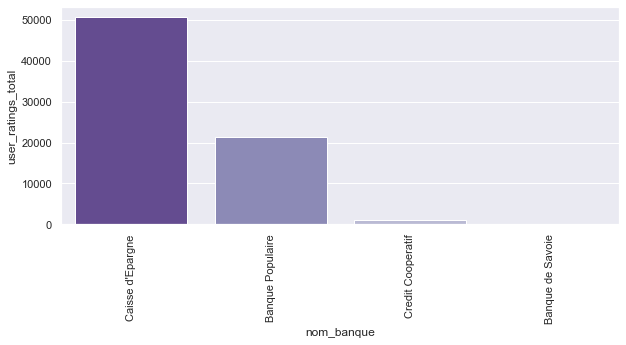

In [11]:
ax = sns.barplot(x="nom_banque", y="user_ratings_total", data=grouped_df, palette = "Purples_r")
ax.tick_params(axis='x', rotation=90)

On constate que le nombre total des avis sur les banques CE est 2 fois le nombre des avis pour les banques BP.

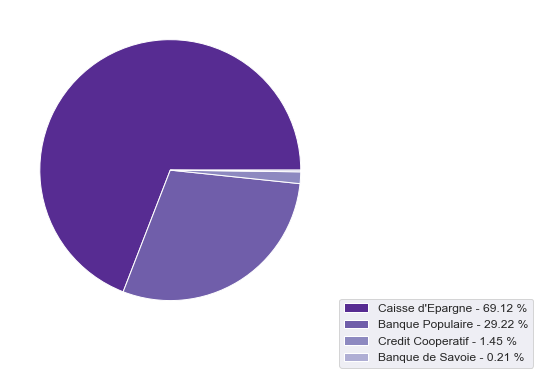

In [23]:
plt.subplots(figsize=(20,6))

patches, texts = plt.pie(grouped_df['user_ratings_total'],colors = sns.color_palette("Purples_r"))

porcent = 100.*grouped_df['user_ratings_total']/grouped_df['user_ratings_total'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(grouped_df['nom_banque'],porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, grouped_df['user_ratings_total']),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0),
           fontsize=12)
plt.show()

### Total ratings per etab

In [13]:
df_wi.groupby(['nom_banque','nom_etab'])['user_ratings_total'].sum()

nom_banque         nom_etab                                    
Banque Populaire   BRED-Banque Populaire                            3459.0
                   Banque Populaire Alsace Lorraine Champagne       1685.0
                   Banque Populaire Aquitaine Centre Atlantique     1006.0
                   Banque Populaire Auvergne Rhône Alpes            2149.0
                   Banque Populaire Bourgogne Franche-Comté         1544.0
                   Banque Populaire Grand Ouest                     2227.0
                   Banque Populaire Méditerranée                    1378.0
                   Banque Populaire Occitane                        1527.0
                   Banque Populaire Rives de Paris                  2492.0
                   Banque Populaire Val de France                   1430.0
                   Banque Populaire du Nord                         1135.0
                   Banque Populaire du Sud                          1207.0
                   CASDEN Banque Pop

In [14]:
grouped_raw = df_wi.groupby(['nom_banque','nom_etab'])['user_ratings_total'].sum().reset_index()
grouped_ce = grouped_raw[grouped_raw["nom_banque"].str.contains("Caisse d'Epargne")]\
    .sort_values('user_ratings_total', ascending=False)
grouped_bpp = grouped_raw[grouped_raw["nom_banque"].str.contains("Banque Populaire")]\
    .sort_values('user_ratings_total', ascending=False)

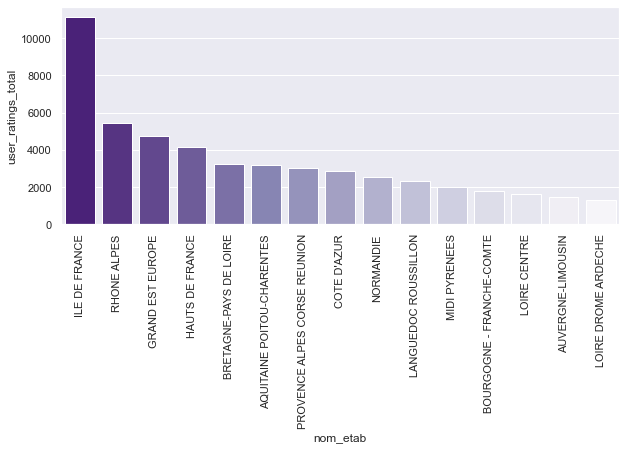

In [15]:
ax = sns.barplot(x="nom_etab", y='user_ratings_total', data=grouped_ce, palette = "Purples_r")
ax.tick_params(axis='x', rotation=90)

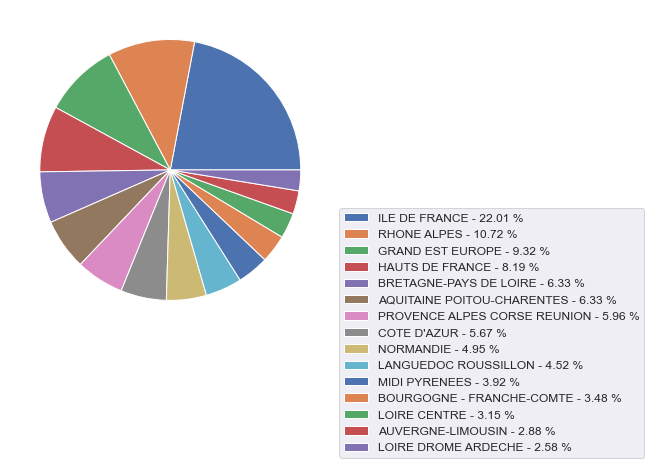

In [22]:
plt.subplots(figsize=(20,6))

patches, texts = plt.pie(grouped_ce['user_ratings_total'])

porcent = 100.*grouped_ce['user_ratings_total']/grouped_ce['user_ratings_total'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(grouped_ce['nom_etab'],porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, grouped_ce['user_ratings_total']),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0),
           fontsize=12)
plt.show()

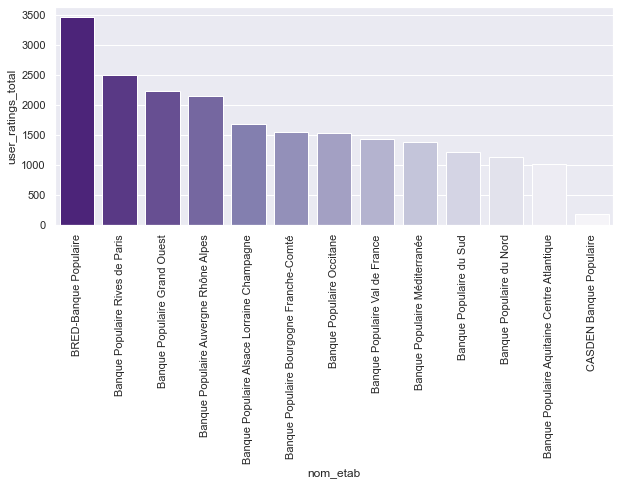

In [24]:
ax = sns.barplot(x="nom_etab", y='user_ratings_total', data=grouped_bpp, palette = "Purples_r")
ax.tick_params(axis='x', rotation=90)

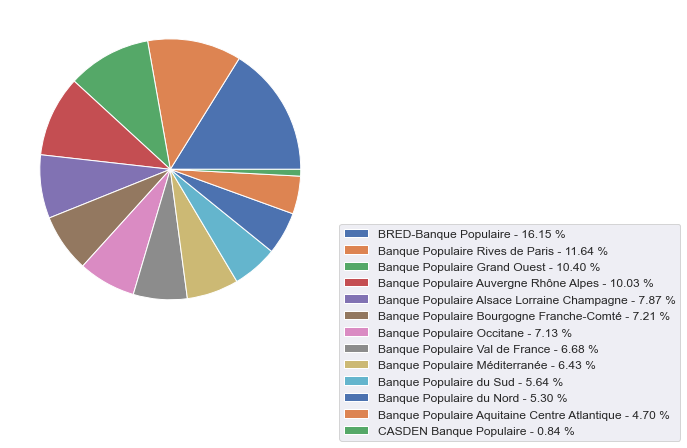

In [26]:
plt.subplots(figsize=(20,6))

patches, texts = plt.pie(grouped_bpp['user_ratings_total'])

porcent = 100.*grouped_bpp['user_ratings_total']/grouped_bpp['user_ratings_total'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(grouped_bpp['nom_etab'],porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, grouped_bpp['user_ratings_total']),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0),
           fontsize=12)
plt.show()

### Avg number of ratings per bank

In [27]:
df_wi.groupby('nom_banque')['user_ratings_total'].mean()

nom_banque
Banque Populaire      9.553078
Banque de Savoie      4.371429
Caisse d'Epargne     14.285956
Credit Cooperatif    17.683333
Name: user_ratings_total, dtype: float64

In [28]:
grouped = df_wi.groupby('nom_banque')['user_ratings_total'].mean().reset_index()
grouped_df = grouped.sort_values('user_ratings_total', ascending=False)

<AxesSubplot:xlabel='nom_banque', ylabel='user_ratings_total'>

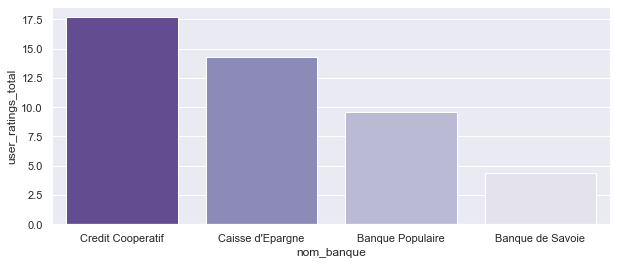

In [29]:
sns.barplot(x="nom_banque", y="user_ratings_total", data=grouped_df, palette = "Purples_r")

### Avg number of ratings per etab

In [196]:
df_wi.groupby(['nom_banque','nom_etab'])['user_ratings_total'].mean()

nom_banque         nom_etab                                    
Banque Populaire   BRED-Banque Populaire                           15.722727
                   Banque Populaire Alsace Lorraine Champagne       9.010695
                   Banque Populaire Aquitaine Centre Atlantique     6.023952
                   Banque Populaire Auvergne Rhône Alpes            8.078947
                   Banque Populaire Bourgogne Franche-Comté         9.472393
                   Banque Populaire Grand Ouest                     9.941964
                   Banque Populaire Méditerranée                    9.503448
                   Banque Populaire Occitane                        8.578652
                   Banque Populaire Rives de Paris                 12.649746
                   Banque Populaire Val de France                   8.614458
                   Banque Populaire du Nord                         8.937008
                   Banque Populaire du Sud                          8.100671
            

In [197]:
grouped_raw = df_wi.groupby(['nom_banque','nom_etab'])['user_ratings_total'].mean().reset_index()
grouped_ce = grouped_raw[grouped_raw["nom_banque"].str.contains("Caisse d'Epargne")]\
    .sort_values('user_ratings_total', ascending=False)
grouped_bpp = grouped_raw[grouped_raw["nom_banque"].str.contains("Banque Populaire")]\
    .sort_values('user_ratings_total', ascending=False)

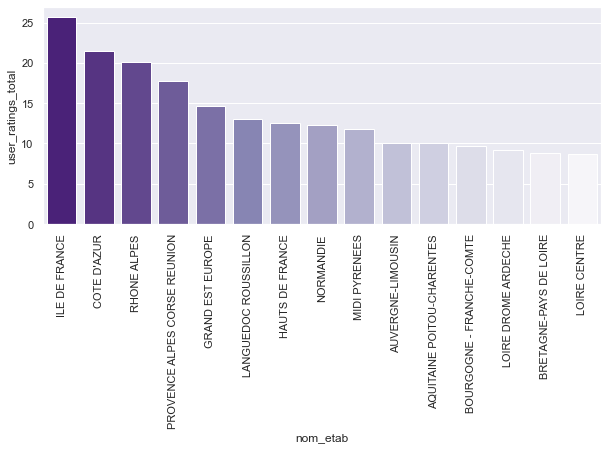

In [198]:
ax = sns.barplot(x="nom_etab", y='user_ratings_total', data=grouped_ce, palette = "Purples_r")
ax.tick_params(axis='x', rotation=90)

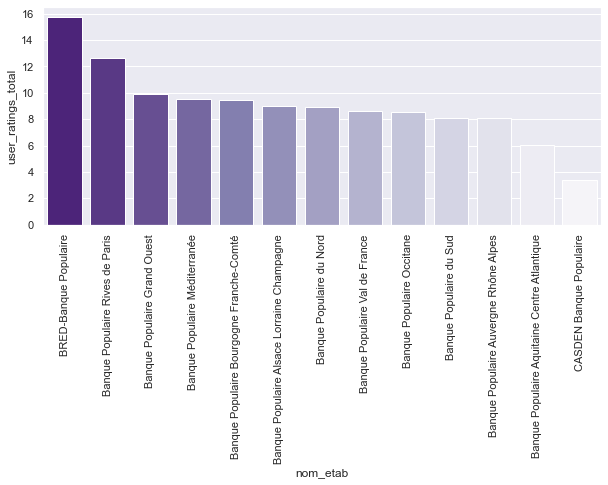

In [199]:
ax = sns.barplot(x="nom_etab", y='user_ratings_total', data=grouped_bpp, palette = "Purples_r")
ax.tick_params(axis='x', rotation=90)

In [200]:
df_wi.groupby('nom_banque')['user_ratings_total'].agg(pd.Series.mode)

nom_banque
Banque Populaire     2.0
Banque de Savoie     2.0
Caisse d'Epargne     6.0
Credit Cooperatif    4.0
Name: user_ratings_total, dtype: float64

In [201]:
df_wi.groupby(['nom_banque','nom_etab'])['user_ratings_total'].agg(pd.Series.mode)

nom_banque         nom_etab                                    
Banque Populaire   BRED-Banque Populaire                                   6.0
                   Banque Populaire Alsace Lorraine Champagne              5.0
                   Banque Populaire Aquitaine Centre Atlantique            2.0
                   Banque Populaire Auvergne Rhône Alpes                   4.0
                   Banque Populaire Bourgogne Franche-Comté                3.0
                   Banque Populaire Grand Ouest                            2.0
                   Banque Populaire Méditerranée                           5.0
                   Banque Populaire Occitane                               1.0
                   Banque Populaire Rives de Paris                 [9.0, 13.0]
                   Banque Populaire Val de France                          6.0
                   Banque Populaire du Nord                                5.0
                   Banque Populaire du Sud                         

### Frequent rating per bank (mode)

In [205]:
df_wi.groupby("nom_banque")["rating"].mean()

nom_banque
Banque Populaire     3.193800
Banque de Savoie     3.448571
Caisse d'Epargne     2.897688
Credit Cooperatif    3.191667
Name: rating, dtype: float64

In [206]:
df_wi.groupby(['nom_banque','nom_etab'])["rating"].mean()

nom_banque         nom_etab                                    
Banque Populaire   BRED-Banque Populaire                           2.559091
                   Banque Populaire Alsace Lorraine Champagne      3.558289
                   Banque Populaire Aquitaine Centre Atlantique    3.314970
                   Banque Populaire Auvergne Rhône Alpes           2.800000
                   Banque Populaire Bourgogne Franche-Comté        3.541718
                   Banque Populaire Grand Ouest                    3.839286
                   Banque Populaire Méditerranée                   2.929655
                   Banque Populaire Occitane                       3.069101
                   Banque Populaire Rives de Paris                 2.789340
                   Banque Populaire Val de France                  3.708434
                   Banque Populaire du Nord                        3.438583
                   Banque Populaire du Sud                         2.984564
                   CASDE

In [69]:
df_2 = df[df['rating']!=0.0].copy()
df_2

code_etab                                      nom_etab code_agence  \
0          17515                                 ILE DE FRANCE          59   
1          17515                                 ILE DE FRANCE          59   
2          17515                                 ILE DE FRANCE          59   
3          17515                                 ILE DE FRANCE          59   
4          17515                                 ILE DE FRANCE          59   
...          ...                                           ...         ...   
26113      10907  Banque Populaire Aquitaine Centre Atlantique       00125   
26114      18715                             AUVERGNE-LIMOUSIN         863   
26115      14445                        BRETAGNE-PAYS DE LOIRE       22028   
26116      13335                    AQUITAINE POITOU-CHARENTES       86327   
26133      16807         Banque Populaire Auvergne Rhône Alpes       00357   

                 nom_agence                          rue        nom_banque  \
0                  COLOMBES  1, PLACE DU GÉNÉRAL LECLERC  Caisse d'Epargne   
1                  COLOMBES  1, PLACE DU GÉNÉRAL LECLERC  Caisse d'Epargne   
2                  COLOMBES  1, PLACE DU GÉNÉRAL LECLERC  Caisse d'Epargne   
3                  COLOMBES  1, PLACE DU GÉNÉRAL LECLERC  Caisse d'Epargne   
4                  COLOMBES  1, PLACE DU GÉNÉRAL LECLERC  Caisse d'Epargne   
...                     ...                          ...               ...   
26113               MIMIZAN           5, ave de Bordeaux  Banque Populaire   
26114                 TENCE      13, RUE DE SAINT AGREVE  Caisse d'Epargne   
26115              LANNILIS       2 PLACE DE L'AUDITOIRE  Caisse d'Epargne   
26116            SECONDIGNY               6, RUE D'ANJOU  Caisse d'Epargne   
26133  DOMPIERRE SUR BESBRE      21, pl de la République  Banque Populaire   

                          place_id  rating  user_ratings_total  \
0      ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9               143.0   
1      ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9               143.0   
2      ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9               143.0   
3      ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9               143.0   
4      ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9               143.0   
...                            ...     ...                 ...   
26113  ChIJVT8J2MqJUw0RZ87ztLpove4     1.0                 1.0   
26114  ChIJx4b94Vqa9UcRs9d4ZDJchmM     5.0                 1.0   
26115  ChIJRVA6MramFkgRQFxyN3roDvY     2.0                 1.0   
26116  ChIJ1zyqqT8RB0gRu-8sG7ipxxU     2.0                 1.0   
26133  ChIJ33XvJuxr8UcRw3zONWEkHlQ     5.0                 1.0   

                     lat_lng           author_name  user_rating  \
0       48.9222280,2.2524041              imane mb          5.0   
1       48.9222280,2.2524041  Kevina Lopes Martins          1.0   
2       48.9222280,2.2524041           Abdel Yezli          5.0   
3       48.9222280,2.2524041         Kinane Djebli          1.0   
4       48.9222280,2.2524041    Chrisley Princivil          1.0   
...                      ...                   ...          ...   
26113  44.2028043,-1.2289033            Abel Rocha          1.0   
26114   45.1138168,4.2910531         Cedric BERGER          5.0   
26115  48.5691694,-4.5210961         Angie Madison          2.0   
26116  46.6099157,-0.4183168          Martin Héros          2.0   
26133   46.5217212,3.6818435       Laurine Lavocat          5.0   

                                                    text review_date  \
0      Mon conseiller de Colombes  (je ne me souviens...  2022-02-16   
1      Un manque de professionnalisme flagrant !!\nPe...  2022-02-12   
2      Mme Labed est une super directrice à l'écoute....  2022-01-16   
3      0 professionnalisme ! Une banque à fuir. Domma...  2021-11-27   
4      Si j’avais pu mettre 0 je l’aurais fait. Une a...  2022-02-11   
...                                                  ...         ...   
26113  A fuir absolument a se d

In [70]:
df_2.groupby("nom_banque")["user_rating"].agg(pd.Series.mode)

nom_banque
Banque Populaire     5.0
Banque de Savoie     5.0
Caisse d'Epargne     1.0
Credit Cooperatif    5.0
Name: user_rating, dtype: float64

In [73]:
df_2.groupby(["nom_banque","user_rating"]).size()/df_2.groupby(["nom_banque"]).size()

nom_banque         user_rating
Banque Populaire   1.0            0.421416
                   2.0            0.030639
                   3.0            0.026561
                   4.0            0.062219
                   5.0            0.459166
Banque de Savoie   1.0            0.407407
                   2.0            0.009259
                   3.0            0.027778
                   4.0            0.064815
                   5.0            0.490741
Caisse d'Epargne   1.0            0.478662
                   2.0            0.030492
                   3.0            0.025854
                   4.0            0.053315
                   5.0            0.411677
Credit Cooperatif  1.0            0.387097
                   2.0            0.014337
                   3.0            0.039427
                   4.0            0.068100
                   5.0            0.491039
dtype: float64

### Frequent rating per etab (mode)

In [210]:
df_2.groupby(['nom_banque','nom_etab'])["user_rating"].agg(pd.Series.mode)

nom_banque         nom_etab                                    
Banque Populaire   BRED-Banque Populaire                           1.0
                   Banque Populaire Alsace Lorraine Champagne      5.0
                   Banque Populaire Aquitaine Centre Atlantique    5.0
                   Banque Populaire Auvergne Rhône Alpes           1.0
                   Banque Populaire Bourgogne Franche-Comté        5.0
                   Banque Populaire Grand Ouest                    5.0
                   Banque Populaire Méditerranée                   1.0
                   Banque Populaire Occitane                       1.0
                   Banque Populaire Rives de Paris                 1.0
                   Banque Populaire Val de France                  5.0
                   Banque Populaire du Nord                        5.0
                   Banque Populaire du Sud                         1.0
                   CASDEN Banque Populaire                         5.0
Banque de Sav

In [212]:
grouped_raw = df_2.groupby(['nom_banque','nom_etab'])["user_rating"].agg(pd.Series.mode).reset_index()
grouped_ce = grouped_raw[grouped_raw["nom_banque"].str.contains("Caisse d'Epargne")]\
    .sort_values('user_rating', ascending=False)
grouped_bpp = grouped_raw[grouped_raw["nom_banque"].str.contains("Banque Populaire")]\
    .sort_values('user_rating', ascending=False)

[(0.0, 5.0)]

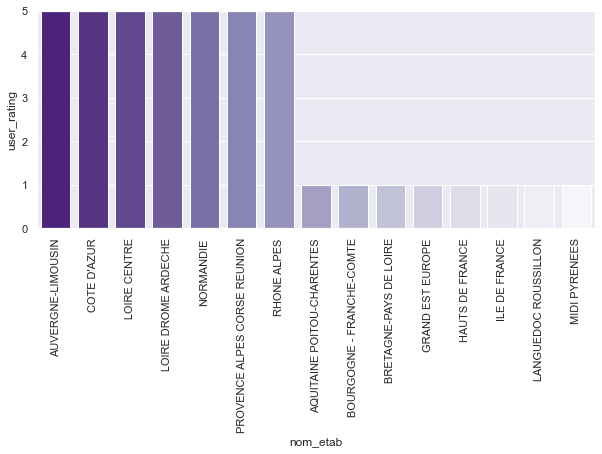

In [213]:
ax = sns.barplot(x="nom_etab", y='user_rating', data=grouped_ce, palette = "Purples_r")
ax.tick_params(axis='x', rotation=90)
ax.set(ylim=(0.0, 5.0))

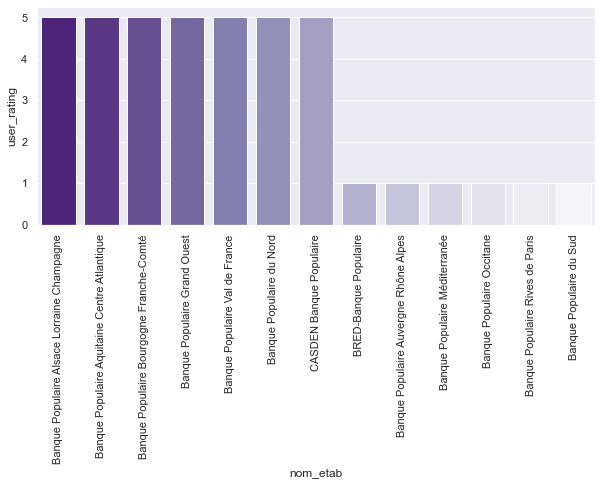

In [214]:
ax = sns.barplot(x="nom_etab", y='user_rating', data=grouped_bpp, palette = "Purples_r")
ax.tick_params(axis='x', rotation=90)

In [78]:
df_wi.groupby("nom_banque")["rating"].std()

nom_banque
Banque Populaire     0.971376
Banque de Savoie     1.060015
Caisse d'Epargne     0.879972
Credit Cooperatif    0.711970
Name: rating, dtype: float64

In [79]:
df_wi.groupby(['nom_banque','nom_etab'])["rating"].std()

nom_banque         nom_etab                                    
Banque Populaire   BRED-Banque Populaire                           0.970135
                   Banque Populaire Alsace Lorraine Champagne      0.845796
                   Banque Populaire Aquitaine Centre Atlantique    0.918044
                   Banque Populaire Auvergne Rhône Alpes           0.905358
                   Banque Populaire Bourgogne Franche-Comté        0.920312
                   Banque Populaire Grand Ouest                    0.714718
                   Banque Populaire Méditerranée                   0.896747
                   Banque Populaire Occitane                       0.897121
                   Banque Populaire Rives de Paris                 0.789986
                   Banque Populaire Val de France                  0.815336
                   Banque Populaire du Nord                        0.800127
                   Banque Populaire du Sud                         0.854906
                   CASDE

In [288]:
df_wi[df_wi["user_rating"]==5.0].groupby("nom_banque")["user_rating"].size()

nom_banque
Banque Populaire     4391
Banque de Savoie       53
Caisse d'Epargne     6656
Credit Cooperatif     137
Name: user_rating, dtype: int64

In [289]:
df_wi[df_wi["user_rating"]==5.0].groupby(["nom_banque","nom_etab"])["user_rating"].size()

nom_banque         nom_etab                                    
Banque Populaire   BRED-Banque Populaire                           332
                   Banque Populaire Alsace Lorraine Champagne      449
                   Banque Populaire Aquitaine Centre Atlantique    285
                   Banque Populaire Auvergne Rhône Alpes           386
                   Banque Populaire Bourgogne Franche-Comté        385
                   Banque Populaire Grand Ouest                    618
                   Banque Populaire Méditerranée                   280
                   Banque Populaire Occitane                       297
                   Banque Populaire Rives de Paris                 335
                   Banque Populaire Val de France                  419
                   Banque Populaire du Nord                        312
                   Banque Populaire du Sud                         227
                   CASDEN Banque Populaire                          66
Banque de Sav

### Agencies with ratings > 3.0 per bank (percentage)

In [215]:
100 * df_ids[df_ids['rating']>3.0].groupby("nom_banque").size()/df_ids.groupby("nom_banque").size()

nom_banque
Banque Populaire     48.151191
Banque de Savoie     48.888889
Caisse d'Epargne     37.614927
Credit Cooperatif    45.901639
dtype: float64

In [ ]:
#4849/9563

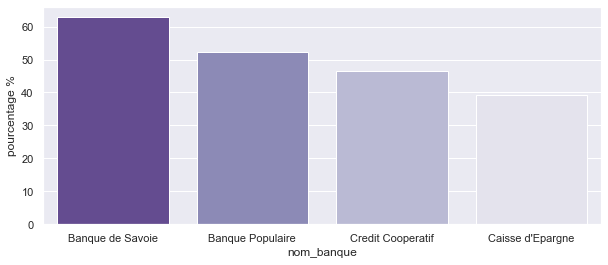

In [216]:
grouped = (100 * df_ids[df_ids['rating']>3.0].groupby("nom_banque").size()/df_wi.groupby("nom_banque").size()).reset_index()
grouped_df = grouped.sort_values(0, ascending=False).rename(columns={0:'pourcentage %'})
ax = sns.barplot(x="nom_banque", y="pourcentage %", data=grouped_df, palette = "Purples_r")

### Agencies with ratings > 3.0 per etab (percentage)

In [11]:
100 * df_ids[df_ids['rating']>3.0].groupby(['nom_banque','nom_etab']).size()/df_wi.groupby(['nom_banque','nom_etab']).size()

nom_banque         nom_etab                                    
Banque Populaire   BRED-Banque Populaire                           26.818182
                   Banque Populaire Alsace Lorraine Champagne      71.657754
                   Banque Populaire Aquitaine Centre Atlantique    53.892216
                   Banque Populaire Auvergne Rhône Alpes           31.578947
                   Banque Populaire Bourgogne Franche-Comté        70.552147
                   Banque Populaire Grand Ouest                    81.250000
                   Banque Populaire Méditerranée                   39.310345
                   Banque Populaire Occitane                       47.191011
                   Banque Populaire Rives de Paris                 33.502538
                   Banque Populaire Val de France                  78.313253
                   Banque Populaire du Nord                        66.929134
                   Banque Populaire du Sud                         38.255034
            

In [27]:
df_wi.groupby(['nom_banque','nom_etab']).size()

nom_banque         nom_etab                                    
Banque Populaire   BRED-Banque Populaire                           220
                   Banque Populaire Alsace Lorraine Champagne      187
                   Banque Populaire Aquitaine Centre Atlantique    167
                   Banque Populaire Auvergne Rhône Alpes           266
                   Banque Populaire Bourgogne Franche-Comté        163
                   Banque Populaire Grand Ouest                    224
                   Banque Populaire Méditerranée                   145
                   Banque Populaire Occitane                       178
                   Banque Populaire Rives de Paris                 197
                   Banque Populaire Val de France                  166
                   Banque Populaire du Nord                        127
                   Banque Populaire du Sud                         149
                   CASDEN Banque Populaire                          53
Banque de Sav

In [17]:
grouped_raw = (df_ids[df_ids['rating']>3.0].groupby(['nom_banque','nom_etab']).size()).reset_index()
grouped_raw.rename(columns={0:'rating > 3'}, inplace = True)
grouped_raw['nbr_agence'] = df_wi.groupby(['nom_banque','nom_etab']).size().reset_index()[0]
grouped_raw['rating <= 3'] = grouped_raw['nbr_agence'] - grouped_raw['rating > 3']

grouped_ce = grouped_raw[grouped_raw["nom_banque"].str.contains("Caisse d'Epargne")]\
    .sort_values('nbr_agence', ascending=False)
grouped_bpp = grouped_raw[grouped_raw["nom_banque"].str.contains("Banque Populaire")]\
    .sort_values('nbr_agence', ascending=False)

In [18]:
grouped_ce

nom_banque                      nom_etab  rating > 3  nbr_agence  \
21  Caisse d'Epargne                 ILE DE FRANCE          70         434   
17  Caisse d'Epargne        BRETAGNE-PAYS DE LOIRE          76         362   
20  Caisse d'Epargne               HAUTS DE FRANCE          86         331   
19  Caisse d'Epargne              GRAND EST EUROPE         137         323   
14  Caisse d'Epargne    AQUITAINE POITOU-CHARENTES         118         319   
28  Caisse d'Epargne                   RHONE ALPES         150         270   
26  Caisse d'Epargne                     NORMANDIE         140         204   
23  Caisse d'Epargne                  LOIRE CENTRE         121         185   
16  Caisse d'Epargne     BOURGOGNE - FRANCHE-COMTE          84         183   
22  Caisse d'Epargne          LANGUEDOC ROUSSILLON          44         176   
27  Caisse d'Epargne  PROVENCE ALPES CORSE REUNION          82         170   
25  Caisse d'Epargne                 MIDI PYRENEES          36         168   
15  Caisse d'Epargne             AUVERGNE-LIMOUSIN          86         145   
24  Caisse d'Epargne           LOIRE DROME ARDECHE          66         142   
18  Caisse d'Epargne                   COTE D'AZUR          95         134   

    rating <= 3  
21          364  
17          286  
20          245  
19          186  
14          201  
28          120  
26           64  
23           64  
16           99  
22          132  
27           88  
25          132  
15           59  
24           76  
18           39

In [32]:
grouped_raw.nbr_agence.max()

434

<AxesSubplot:xlabel='nom_etab'>

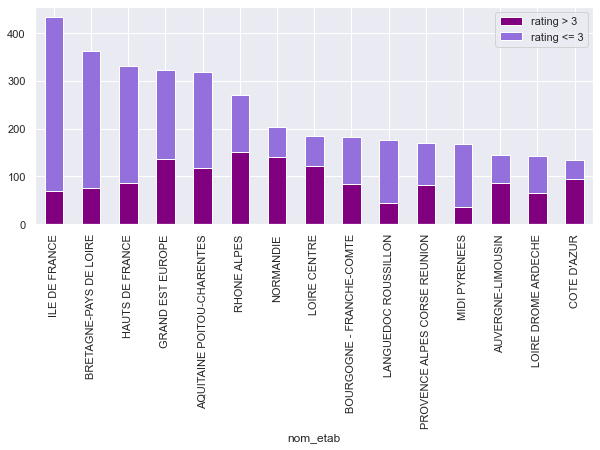

In [31]:
df_draw = grouped_ce[['nom_etab','rating > 3','rating <= 3']]
df_draw.set_index('nom_etab').plot(kind='bar', stacked=True, color=['purple','mediumpurple'])


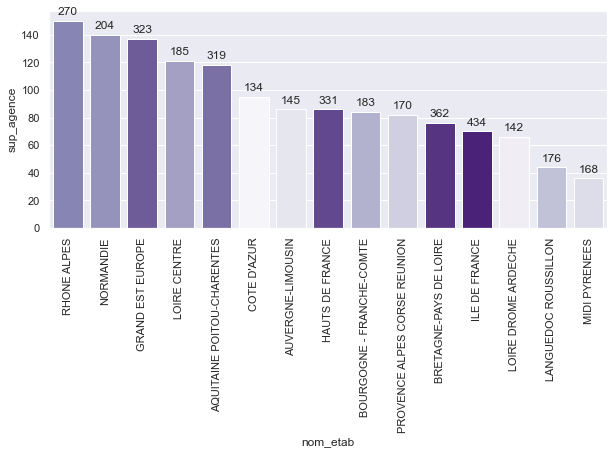

In [126]:
pal = sns.color_palette("Purples_r", len(grouped_ce))
rank = grouped_ce['nbr_agence'].argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
ax = sns.barplot(x="nom_etab", y='sup_agence', palette=np.array(pal[::-1])[rank], data=grouped_ce)
for idx,p in enumerate(ax.patches):
    if p.get_height()!=0:
        # access with `iloc`, not `loc`
        val_me=grouped_ce['nbr_agence'].iloc[idx]
        ax.annotate(val_me,
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

ax.tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='nom_etab'>

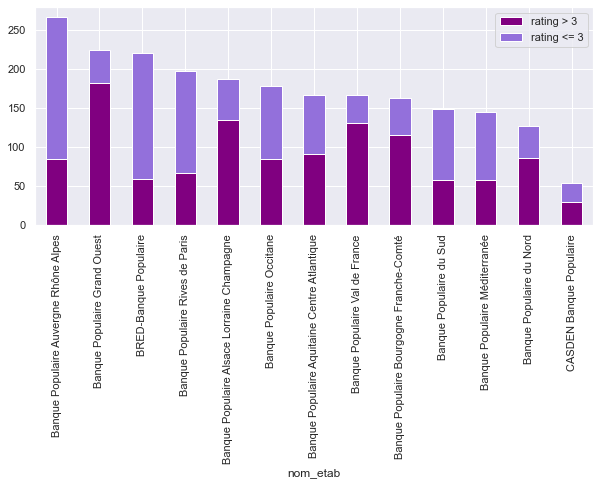

In [32]:
df_draw = grouped_bpp[['nom_etab','rating > 3','rating <= 3']]
df_draw.set_index('nom_etab').plot(kind='bar', stacked=True, color=['purple','mediumpurple'])


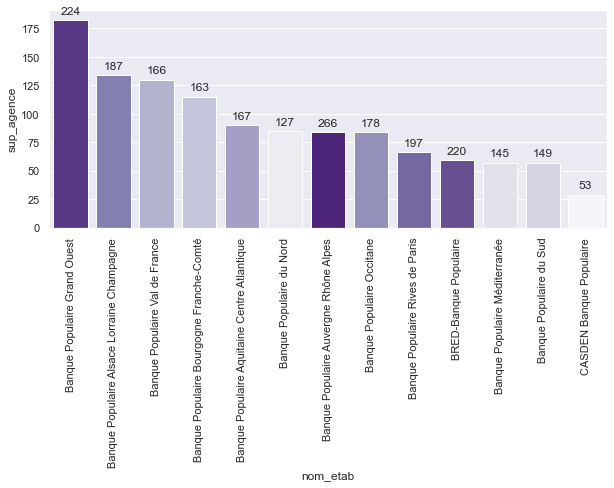

In [127]:
pal = sns.color_palette("Purples_r", len(grouped_bpp))
rank = grouped_bpp['nbr_agence'].argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
ax = sns.barplot(x="nom_etab", y='sup_agence', palette=np.array(pal[::-1])[rank], data=grouped_bpp)
for idx,p in enumerate(ax.patches):
    if p.get_height()!=0:
        # access with `iloc`, not `loc`
        val_me=grouped_bpp['nbr_agence'].iloc[idx]
        ax.annotate(val_me,
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

ax.tick_params(axis='x', rotation=90)

### Reviews without texts per bank

In [223]:
df_temp = df_2[(df_2["rating"]!=0)&(df_2["text"].isnull())]
df_temp

code_etab                        nom_etab code_agence  \
5893       15135                GRAND EST EUROPE       51395   
5894       15135                GRAND EST EUROPE       51395   
7243       18707  Banque Populaire Val de France       00740   
7244       18707  Banque Populaire Val de France       00740   
8236       15135                GRAND EST EUROPE       57633   
...          ...                             ...         ...   
26100      18715               AUVERGNE-LIMOUSIN         856   
26102      13135                   MIDI PYRENEES         441   
26103      14445          BRETAGNE-PAYS DE LOIRE       11217   
26109      17807       Banque Populaire Occitane       00226   
26111      14607   Banque Populaire Méditerranée       00324   

                         nom_agence                   rue        nom_banque  \
5893   DEPARTEMENT INGENIERIE REIMS      12/14 RUE CARNOT  Caisse d'Epargne   
5894   DEPARTEMENT INGENIERIE REIMS      12/14 RUE CARNOT  Caisse d'Epargne   
7243                  CHATELLERAULT     60-62, bd Blossac  Banque Populaire   
7244                  CHATELLERAULT     60-62, bd Blossac  Banque Populaire   
8236      THIONVILLE COTE DES ROSES   9, RUE SAINTE BARBE  Caisse d'Epargne   
...                             ...                   ...               ...   
26100     LE MONASTIER SUR GAZEILLE   43 RUE SAINT PIERRE  Caisse d'Epargne   
26102                      MAUVEZIN   2 BIS RUE TOURNEUVE  Caisse d'Epargne   
26103        CENTRE AFFAIRES SARTHE   47 AVENUE BARTHOLDI  Caisse d'Epargne   
26109            BAGNERES DE LUCHON         1, ave Carnot  Banque Populaire   
26111            ST JEAN CAP FERRAT  5, ave Claude Vignon  Banque Populaire   

                          place_id  rating  user_ratings_total  \
5893   ChIJ1diM2ax16UcRE7kQTcSv37M     4.0                19.0   
5894   ChIJ1diM2ax16UcRE7kQTcSv37M     4.0                19.0   
7243   ChIJUT2iMeSp_UcRclgi38Glbrk     4.5                17.0   
7244   ChIJUT2iMeSp_UcRclgi38Glbrk     4.5                17.0   
8236   ChIJv5-5Tck6lUcRZPvo6m5MSYM     2.3                15.0   
...                            ...     ...                 ...   
26100  ChIJE975VOP19UcRP5p1xdqy4sY     5.0                 1.0   
26102  ChIJX22ii8FgqRIRk6hMXNUHxl8     3.0                 1.0   
26103  ChIJP0wHbBiG4kcR8udJ0EjoeZs     4.0                 1.0   
26109  ChIJTUpsY_BhqBIRuNMF66G7OS4     5.0                 1.0   
26111  ChIJ2TQxaWrbzRIRDtKt7-F698Y     5.0                 1.0   

                    lat_lng        author_name  user_rating text review_date  \
5893   49.2551680,4.0326269   Patricia Bernard          3.0  NaN  2020-08-23   
5894   49.2551680,4.0326269          Carole L.          3.0  NaN  2018-12-30   
7243   46.8170621,0.5459644        Manuelle H.          5.0  NaN  2021-03-31   
7244   46.8170621,0.5459644    Emmanuel Maurin          5.0  NaN  2021-01-15   
8236   49.3703817,6.1509108        Celine GRUY          5.0  NaN  2021-12-25   
...                     ...                ...          ...  ...         ...   
26100  44.9394308,3.9943402           eric DOT          5.0  NaN  2022-02-04   
26102  43.7296251,0.8786046     Jerôme Ducasse          3.0  NaN  2017-12-28   
26103  48.0201446,0.1591594  mustapha ouargaga          4.0  NaN  2018-04-02   
26109  42.7917208,0.5913212           Michel R          5.0  NaN  2020-12-18   
26111  43.6885680,7.3336734       Greg Garelli          5.0  NaN  2020-07-14   

                                                 address       phone_number  \
5893               12/14 Rue Carnot, 51000 Reims, France  +33 3 26 79 79 79   
5894               12/14 Rue Carnot, 51000 Reims, France  +33 3 26 79 79 79   
7243    60-62 Bd de Blossac, 86100 Châtellerault, France  +33 9 88 98 90 18   
7244    60-62 Bd de Blossac, 86100 Châtellerault, France  +33 9 88 98 90 18   
8236        9 Rue Sainte-Barbe, 57100 Thionville, France  +33 3 56 20 21 34   
...                                                  ...     

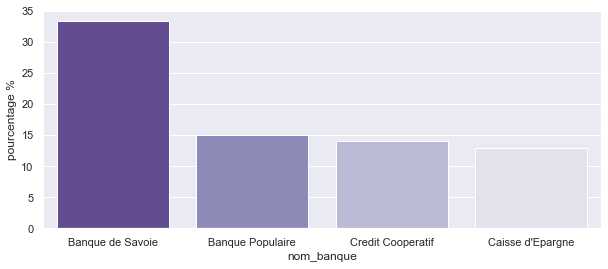

In [224]:
grouped = (100 * df_temp.groupby("nom_banque").size()/df_2.groupby("nom_banque").size()).reset_index()
grouped_df = grouped.sort_values(0, ascending=False).rename(columns={0:'pourcentage %'})
ax = sns.barplot(x="nom_banque", y="pourcentage %", data=grouped_df, palette = "Purples_r")

# Investigating duplicates

In [98]:
df_wi.groupby(['nom_banque','nom_etab','nom_agence']).size()\
    [df_wi.groupby(['nom_banque','nom_etab','nom_agence']).size()>5]

# we should query by place_id because we can have same name of agence of same etab, diff rue and diff place_id

nom_banque        nom_etab                  nom_agence
Banque Populaire  Banque Populaire du Nord  MAUBEUGE      10
                                            TOURCOING      6
dtype: int64

In [108]:
df_wi[(df_wi["nom_agence"].str.contains("MAUBEUGE")) &\
      df_wi["nom_etab"].str.contains("Banque Populaire du Nord")]

code_etab                  nom_etab code_agence nom_agence  \
7995       13507  Banque Populaire du Nord       00103   MAUBEUGE   
7996       13507  Banque Populaire du Nord       00103   MAUBEUGE   
7997       13507  Banque Populaire du Nord       00103   MAUBEUGE   
7998       13507  Banque Populaire du Nord       00103   MAUBEUGE   
7999       13507  Banque Populaire du Nord       00103   MAUBEUGE   
13505      13507  Banque Populaire du Nord       00188   MAUBEUGE   
13506      13507  Banque Populaire du Nord       00188   MAUBEUGE   
13507      13507  Banque Populaire du Nord       00188   MAUBEUGE   
13508      13507  Banque Populaire du Nord       00188   MAUBEUGE   
13509      13507  Banque Populaire du Nord       00188   MAUBEUGE   

                        rue        nom_banque                     place_id  \
7995      1, ave Albert 1er  Banque Populaire  ChIJF25lOixowkcRY39hPf3BoZI   
7996      1, ave Albert 1er  Banque Populaire  ChIJF25lOixowkcRY39hPf3BoZI   
7997      1, ave Albert 1er  Banque Populaire  ChIJF25lOixowkcRY39hPf3BoZI   
7998      1, ave Albert 1er  Banque Populaire  ChIJF25lOixowkcRY39hPf3BoZI   
7999      1, ave Albert 1er  Banque Populaire  ChIJF25lOixowkcRY39hPf3BoZI   
13505  58-60, ave de France  Banque Populaire  ChIJF25lOixowkcRBiB2ohDChmk   
13506  58-60, ave de France  Banque Populaire  ChIJF25lOixowkcRBiB2ohDChmk   
13507  58-60, ave de France  Banque Populaire  ChIJF25lOixowkcRBiB2ohDChmk   
13508  58-60, ave de France  Banque Populaire  ChIJF25lOixowkcRBiB2ohDChmk   
13509  58-60, ave de France  Banque Populaire  ChIJF25lOixowkcRBiB2ohDChmk   

       rating  user_ratings_total               lat_lng           author_name  \
7995      3.1                15.0  50.2789642,3.9737375  kat frenoy doussaint   
7996      3.1                15.0  50.2789642,3.9737375            Sana Sabri   
7997      3.1                15.0  50.2789642,3.9737375           Ziggy Ancet   
7998      3.1                15.0  50.2789642,3.9737375        lydia antolini   
7999      3.1                15.0  50.2789642,3.9737375      Francois Bauduin   
13505     3.2                10.0  50.2735794,3.9718718             Jeane Dcl   
13506     3.2                10.0  50.2735794,3.9718718               Sabrina   
13507     3.2                10.0  50.2735794,3.9718718           Alan JENARD   
13508     3.2                10.0  50.2735794,3.9718718         Suzy Briffard   
13509     3.2                10.0  50.2735794,3.9718718         Sarah Mouniib   

       user_rating                                               text  \
7995           1.0  Déçue malgré plusieurs années chez eux, consei...   
7996           5.0  Cliente depuis presque 10 ans , je recommande ...   
7997           5.0  Il n’y a pas un seul critère de mauvais. Que ç...   
7998           5.0                        personnel très sympathique.   
7999           5.0  Remerciements à la  Banque Populaire du Nord\n...   
13505          1.0  Les frais que prélève cette banque est catastr...   
13506          1.0  Conseillé qui retire des frais quand bon leur ...   
13507          1.0  Personnel qui ne connait pas la politesse.. Co...   
13508          1.0                                                NaN   
13509          5.0                                                NaN   

      review_date                                      address  \
7995   2022-03-22     1 Av. Albert 1er, 59600 Maubeuge, France   
7996   2022-02-04     1 Av. Albert 1er, 59600 Maubeuge, France   
7997   2021-04-22     1 Av. Albert 1er, 59600 Maubeuge, France   
7998   2021-04-19     1 Av. Albert 1er, 59600 Maubeuge, France   
7999   2020-05-02     1 Av. Albert 1er, 59600 Maubeuge, France   
13505  2021-05-20  58-60 Av. de France, 59600 Maubeuge, France   
13506  2019-04-02  58-60 Av. de France, 59600 Maubeuge, France   
13507  2017-09-29  58-60 Av. de France, 59600 Maubeuge, France   
13508  2018-07-18  58-60 Av. de France, 59600 Maubeuge, France   
13509  2017-10-05  58-60 Av. de 

# R2 score

In [225]:
import sklearn
from sklearn.metrics import mean_squared_error

In [226]:
reviews_rating = df_2.groupby(['place_id'])["user_rating"].mean().to_list()
actual_rating = df_2.groupby(['place_id'])["rating"].agg(pd.Series.mode).to_list()

In [227]:
from sklearn.metrics import r2_score
r2_score(actual_rating, reviews_rating) 
# r2 score is used for assessing Goodness-of-Fit in a Regression Models
# close to 1 => we can rely on the 5 reviews to induce the satisfaction of the client

0.6202411276418673

In [228]:
mean_squared_error(actual_rating, reviews_rating)

0.3791177026082686

In [229]:
print(df_ids.user_ratings_total.sum())
#total of reviews

print(df_ids[df_ids["user_ratings_total"]>5.0].user_ratings_total.sum())
# total reviews of agences with total reviews > 5 

print(df_ids[df_ids["user_ratings_total"]>5.0].shape[0])
#total of agences with toatl reviews >5

print(df_2.shape[0])
# total of collected reviews

73290.0
67909.0
4147
26118


In [230]:
import scipy
from scipy.stats import pearsonr

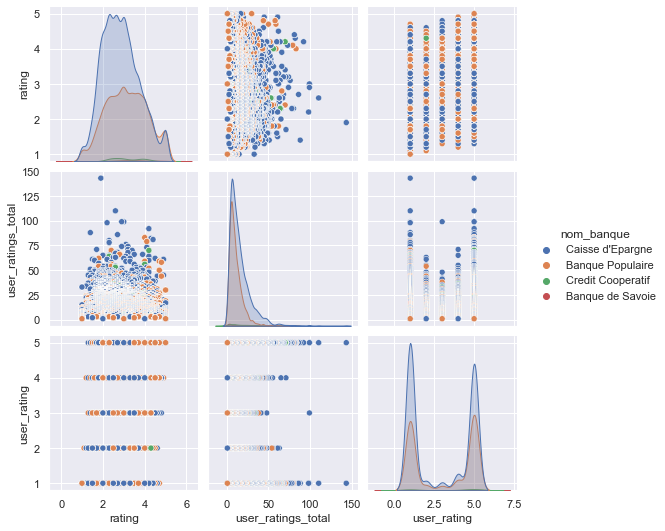

In [231]:
cols_to_plot = df_2.columns[7:12].tolist() + ['nom_banque']
sns.pairplot(df_2[cols_to_plot], hue ="nom_banque")
plt.show()

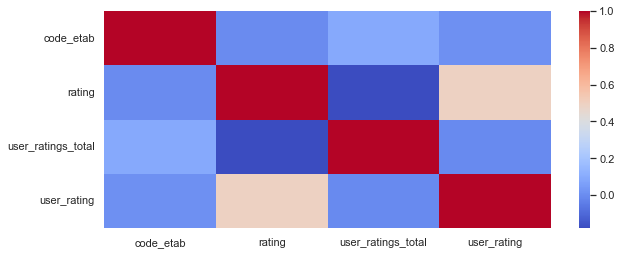

In [232]:
sns.set(rc={'figure.figsize':(10,4)})

df_corr = df_2.corr()

ax = sns.heatmap(df_corr, xticklabels = df_corr.columns , 
                 yticklabels = df_corr.columns, cmap = 'coolwarm')

In [166]:
#correlation btwn rating and user_rating

In [233]:
pearsonr(df_2.user_rating,df_2.rating )

(0.49669419566040623, 0.0)

In [234]:
pearsonr(df_2.user_rating,df_2.user_ratings_total)

(-0.004847638699616769, 0.4333939496956639)

In [236]:
pearsonr(df_2.rating,df_2.user_ratings_total)

(-0.17996566306048267, 5.330580143821103e-189)

# Anova

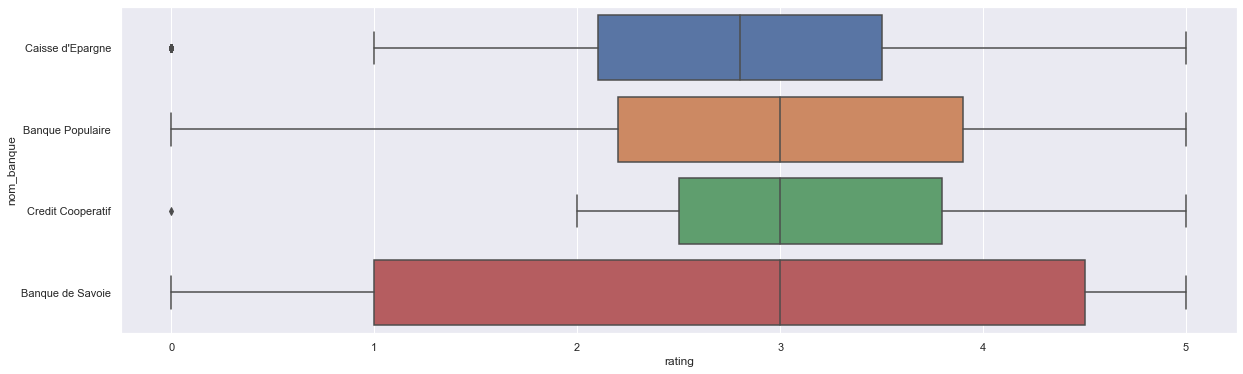

In [239]:
plt.subplots(figsize=(20,6))
ax = sns.boxplot(x="rating", y="nom_banque", data=df_ids)

In [240]:
df_ids.groupby("nom_banque")['rating'].agg('var')

nom_banque
Banque Populaire     1.755711
Banque de Savoie     3.486040
Caisse d'Epargne     1.192536
Credit Cooperatif    0.677426
Name: rating, dtype: float64

In [241]:
from scipy.stats import bartlett
bartlett(df_wi.rating[df_wi.nom_banque == 'Banque Populaire'],
        df_wi.rating[df_wi.nom_banque == 'Banque de Savoie'],
        df_wi.rating[df_wi.nom_banque == "Caisse d'Epargne"],
         df_wi.rating[df_wi.nom_banque == 'Credit Cooperatif'])

BartlettResult(statistic=45.9443023598083, pvalue=5.828262798195245e-10)

In [176]:
#pvalue <<<< 5% , it s not good to do Anova

# Cartographie

In [74]:
import folium
from folium import plugins
from folium.plugins import HeatMap

import branca.colormap as cm

In [207]:
map_hooray = folium.Map(location=[47.2708316,2.5039423],
                        tiles = "Stamen Toner",
                        zoom_start = 6)

In [136]:
def map_points(df, lat_col='Latitude', lon_col='Longitude', zoom_start=6, \
                plot_points=False, pt_radius=10, \
                plot_circles=False,\
                draw_heatmap=False, heat_map_weights_col=None, \
                heat_map_weights_normalize=True, heat_map_radius=15):
    """Creates a map given a dataframe of points. Can also produce a heatmap overlay

    Arg:
        df: dataframe containing points to maps
        lat_col: Column containing latitude (string)
        lon_col: Column containing longitude (string)
        zoom_start: Integer representing the initial zoom of the map
        plot_points: Add points to map (boolean)
        pt_radius: Size of each point
        draw_heatmap: Add heatmap to map (boolean)
        heat_map_weights_col: Column containing heatmap weights
        heat_map_weights_normalize: Normalize heatmap weights (boolean)
        heat_map_radius: Size of heatmap point

    Returns:
        folium map object
    """

    ## center map in the middle of points center in
    middle_lat = df[lat_col].median()
    middle_lon = df[lon_col].median()

    curr_map = folium.Map(tiles = "Stamen Toner",
                          location=[middle_lat, middle_lon],
                          zoom_start=zoom_start)
    colormap = cm.LinearColormap(['red','yellow', 'green'],
                       vmin=0.0, vmax=5.0)
    #add points to map
    if plot_points:
        for _, row in df.iterrows():
            folium.Circle(
                location=[row[lat_col], row[lon_col]],
                radius=10,
                fill=True,
                color=colormap(row['rating']),
                popup=row["nom_etab"]+"<br>"+str(row['Latitude'])+','+str(row['Longitude']),
                fill_opacity=0.2
            ).add_to(curr_map)
    
    # add circles to map
    if plot_circles:
        for _, row in df.iterrows():
            folium.CircleMarker([row[lat_col], row[lon_col]],
                                radius=pt_radius, #5*row[heat_map_weights_col],
                                popup=folium.Popup("<b>"+row["nom_etab"]+"</b>"
                                                    + "<br> Avg Rating : " + "{:.2f}".format(row["avg_rating"])
                                                    + "<br> Avg # ratings : " + "{:.2f}".format(row["avg_nbr_ratings"])
                                                    + "<br> Total # ratings : " + "{:.2f}".format(row["user_ratings_total"])
                                                    + "<br> Frequent user rating : " + "{:.2f}".format(row["mode"])
                                                    + " ({:.2f}%)".format(100*row["mode_freq"])
                                                    + "<br> # agences with high ratings : " + str(row["agence_3"])
                                                       +"/"+str(row["nbr_agence"]),
                                                   min_width=300,max_width=300),
                                fill_color="#BD1816",
                                color = "#BD1816",
                               ).add_to(curr_map)

    # add heatmap
    if draw_heatmap:
        # convert to (n, 2) or (n, 3) matrix format
        if heat_map_weights_col is None:
            cols_to_pull = [lat_col, lon_col]
        else:
            # if we have to normalize
            if heat_map_weights_normalize:
                df[heat_map_weights_col] = \
                    df[heat_map_weights_col] / df[heat_map_weights_col].sum()

            cols_to_pull = [lat_col, lon_col, heat_map_weights_col]

        stations = df[cols_to_pull].values
        curr_map.add_child(plugins.HeatMap(stations, radius=heat_map_radius))
        curr_map.add_child(colormap)

    return curr_map

In [75]:
df_ce = df_ids[df_ids["nom_banque"].str.contains("Caisse d'Epargne")].copy()
df_ce['Latitude'] = df_ce.apply(lambda x : float(x.lat_lng.split(',')[0]), axis=1)
df_ce['Longitude'] = df_ce.apply(lambda x : float(x.lat_lng.split(',')[1]), axis=1)

In [76]:
grouped = df_ce.groupby('nom_etab').mean().reset_index()
grouped

nom_etab  code_etab    rating  user_ratings_total  \
0     AQUITAINE POITOU-CHARENTES      13335  2.625723            9.265896   
1              AUVERGNE-LIMOUSIN      18715  3.257718            9.798658   
2      BOURGOGNE - FRANCHE-COMTE      12135  2.941361            9.219895   
3         BRETAGNE-PAYS DE LOIRE      14445  2.331008            8.286822   
4                    COTE D'AZUR      18315  3.329787           20.354610   
5               GRAND EST EUROPE      15135  2.922590           14.213855   
6                HAUTS DE FRANCE      16275  2.581525           12.161290   
7                  ILE DE FRANCE      17515  2.348984           25.173815   
8           LANGUEDOC ROUSSILLON      13485  2.558333           12.733333   
9                   LOIRE CENTRE      14505  3.268718            8.189744   
10           LOIRE DROME ARDECHE      14265  3.009459            8.817568   
11                 MIDI PYRENEES      13135  2.452601           11.468208   
12                     NORMANDIE      11425  3.364929           11.886256   
13  PROVENCE ALPES CORSE REUNION      11315  2.964246           16.854749   
14                   RHONE ALPES      13825  3.019573           19.334520   

     Latitude  Longitude  
0   45.033216  -0.353163  
1   45.706622   2.647305  
2   47.188623   4.942646  
3   47.763426  -1.855466  
4   43.471464   6.648128  
5   48.692800   6.291070  
6   50.243229   2.818047  
7   48.823033   2.335680  
8   43.492275   3.554952  
9   47.617292   1.557573  
10  45.206238   4.534323  
11  43.725973   1.477978  
12  49.272390   0.264601  
13  43.540475   5.687099  
14  45.726528   5.344086

In [77]:
lat_dict = grouped.set_index('nom_etab').to_dict()['Latitude']
lng_dict = grouped.set_index('nom_etab').to_dict()['Longitude']

lat_dict

{'AQUITAINE POITOU-CHARENTES': 45.033216241618526,
 'AUVERGNE-LIMOUSIN': 45.706622247651005,
 'BOURGOGNE - FRANCHE-COMTE': 47.18862326544505,
 'BRETAGNE-PAYS DE LOIRE': 47.76342608940572,
 "COTE D'AZUR": 43.47146431914892,
 'GRAND EST EUROPE': 48.69280003403607,
 'HAUTS DE FRANCE': 50.24322866744867,
 'ILE DE FRANCE': 48.82303267878102,
 'LANGUEDOC ROUSSILLON': 43.49227455555558,
 'LOIRE CENTRE': 47.617291754871815,
 'LOIRE DROME ARDECHE': 45.20623834527028,
 'MIDI PYRENEES': 43.72597299479767,
 'NORMANDIE': 49.272389687677716,
 'PROVENCE ALPES CORSE REUNION': 43.54047520837987,
 'RHONE ALPES': 45.7265282505338}

In [78]:
lng_dict

{'AQUITAINE POITOU-CHARENTES': -0.3531634968208092,
 'AUVERGNE-LIMOUSIN': 2.647304708053692,
 'BOURGOGNE - FRANCHE-COMTE': 4.942646199476439,
 'BRETAGNE-PAYS DE LOIRE': -1.8554659377260971,
 "COTE D'AZUR": 6.648128100000002,
 'GRAND EST EUROPE': 6.291069994277107,
 'HAUTS DE FRANCE': 2.8180472821114377,
 'ILE DE FRANCE': 2.335680288939053,
 'LANGUEDOC ROUSSILLON': 3.5549521138888913,
 'LOIRE CENTRE': 1.557573188205129,
 'LOIRE DROME ARDECHE': 4.534322916216217,
 'MIDI PYRENEES': 1.4779776098265893,
 'NORMANDIE': 0.2646008104265403,
 'PROVENCE ALPES CORSE REUNION': 5.68709860558659,
 'RHONE ALPES': 5.344086003914587}

In [79]:
df_ce['lat_cen'] = df_ce['nom_etab'].map(lat_dict)
df_ce['lng_cen'] = df_ce['nom_etab'].map(lng_dict)

df_ce

code_etab                      nom_etab code_agence  \
0         17515                 ILE DE FRANCE          59   
1         17515                 ILE DE FRANCE          15   
2         17515                 ILE DE FRANCE          73   
3         17515                 ILE DE FRANCE          12   
4         11315  PROVENCE ALPES CORSE REUNION         123   
...         ...                           ...         ...   
6223      13825                   RHONE ALPES       30829   
6226      13135                 MIDI PYRENEES         323   
6228      14445        BRETAGNE-PAYS DE LOIRE       22137   
6229      13335    AQUITAINE POITOU-CHARENTES       86321   
6236      11315  PROVENCE ALPES CORSE REUNION          61   

                          nom_agence                            rue  \
0                           COLOMBES    1, PLACE DU GÉNÉRAL LECLERC   
1                    PARIS DAUMESNIL          19, PLACE FÉLIX EBOUÉ   
2                            PUTEAUX         51 RUE RICHARD WALLACE   
3                   PARIS RÉPUBLIQUE         134, AVENUE PARMENTIER   
4                   ESTRANGIN PASTRE         PLACE ESTRANGIN PASTRE   
...                              ...                            ...   
6223       PERS. PROTEGEES RHONE AIN            116 COURS LAFAYETTE   
6226                        REQUISTA  PLACE DES ANCIENS COMBATTANTS   
6228                      PLOUFRAGAN              2 RUE DE L ETACHE   
6229                PARTHENAY CENTRE      51-53 BD DE LA MEILLERAYE   
6236  CENTRE D'AFFAIRES CORSE DU SUD      LES JARDINS DE BODICCIONE   

            nom_banque                     place_id  rating  \
0     Caisse d'Epargne  ChIJKyi768Zl5kcRxMYLyp4CB0k     1.9   
1     Caisse d'Epargne  ChIJDwV8Mmly5kcRaAgerdb1oHc     2.6   
2     Caisse d'Epargne  ChIJ4ccoHR9l5kcRrL0xMpzyy0E     3.0   
3     Caisse d'Epargne  ChIJcZkho-Nt5kcR_9GaoOv4heE     2.9   
4     Caisse d'Epargne  ChIJRfBL_LnAyRIRKsLr-97nLJ4     2.2   
...                ...                          ...     ...   
6223  Caisse d'Epargne  ChIJGzaTQADr9EcRQ_Y6gnGh7Tc     0.0   
6226  Caisse d'Epargne  ChIJQ51QR38LshIRRxPelAH0g-k     0.0   
6228  Caisse d'Epargne  ChIJ69jBx4XiEUgR7aOMl9-3fkE     0.0   
6229  Caisse d'Epargne  ChIJq0etScNtB0gRVGUZgzR1B4w     0.0   
6236  Caisse d'Epargne  ChIJ3VdrI3Bp2hIRYvAp5WeN6y0     0.0   

      user_ratings_total                lat_lng   Latitude  Longitude  \
0                  143.0   48.9222280,2.2524041  48.922228   2.252404   
1                  110.0   48.8393186,2.3969837  48.839319   2.396984   
2                   99.0   48.8807443,2.2375647  48.880744   2.237565   
3                   99.0   48.8688381,2.3721251  48.868838   2.372125   
4                   98.0   43.2902160,5.3776134  43.290216   5.377613   
...                  ...                    ...        ...        ...   
6223                 0.0   45.7633204,4.8513118  45.763320   4.851312   
6226                 0.0   44.0315874,2.5357070  44.031587   2.535707   
6228                 0.0  48.4935852,-2.7770535  48.493585  -2.777054   
6229                 0.0  46.6473210,-0.2484153  46.647321  -0.248415   
6236                 0.0   41.9347411,8.7452745  41.934741   8.745275   

        lat_cen   lng_cen  
0     48.823033  2.335680  
1     48.823033  2.335680  
2     48.823033  2.335680  
3     48.823033  2.335680  
4     43.540475  5.687099  
...         ...       ...  
6223  45.726528  5.344086  
6226  43.725973  1.477978  
6228  47.763426 -1.855466  
6229  45.033216 -0.353163  
6236  43.540475  5.687099  

[3697 rows x 14 columns]

## Heatmap ratings (not interesting)

In [153]:
def map_points_delta(df, lat_col='Latitude', lon_col='Longitude', zoom_start=6, \
                draw_heatmap=False, heat_map_weights_col=None, \
                heat_map_weights_normalize=True, heat_map_radius=15):
    """Creates a map given a dataframe of points. Can also produce a heatmap overlay

    Arg:
        df: dataframe containing points to maps
        lat_col: Column containing latitude (string)
        lon_col: Column containing longitude (string)
        zoom_start: Integer representing the initial zoom of the map
        plot_points: Add points to map (boolean)
        pt_radius: Size of each point
        draw_heatmap: Add heatmap to map (boolean)
        heat_map_weights_col: Column containing heatmap weights
        heat_map_weights_normalize: Normalize heatmap weights (boolean)
        heat_map_radius: Size of heatmap point

    Returns:
        folium map object
    """

    ## center map in the middle of points center in
    middle_lat = df[lat_col].median()
    middle_lon = df[lon_col].median()

    curr_map = folium.Map(tiles = "Stamen Toner",
                          location=[middle_lat, middle_lon],
                          zoom_start=zoom_start)
    colormap = cm.LinearColormap(['red','yellow', 'green'],
                       vmin=0.0, vmax=5.0)
    colormap.caption = "Ratings"  # how do I change fontsize and color here?

    

    # Prepare gradient dictionary according to the example like {0.4: ‘blue’, 0.65: ‘lime’, 1: ‘red’}
    gradient_dict = {}

    # Get the index values and colors from the just created branca-colormap
    # NOTE: colors are RGBA-vectors, like "(0.9372549019607843, 0.9529411764705882, 1.0, 1.0)":
    for ind_val, c in zip(colormap.index, colormap.colors):
        # Create gradient dictionary for heatmap on the fly
        r, g, b, a = c
        gradient_dict[ind_val] = f"rgba({r},{g},{b},{a})"
    # add heatmap
    if draw_heatmap:
        # convert to (n, 2) or (n, 3) matrix format
        if heat_map_weights_col is None:
            cols_to_pull = [lat_col, lon_col]
        else:
            # if we have to normalize
            if heat_map_weights_normalize:
                df[heat_map_weights_col] = \
                    df[heat_map_weights_col] / df[heat_map_weights_col].sum()

            cols_to_pull = [lat_col, lon_col, heat_map_weights_col]

        stations = df[cols_to_pull].values
        curr_map.add_child(plugins.HeatMap(stations, radius=heat_map_radius))
    curr_map.add_child(colormap)
    return curr_map

Pas intéréssant la heatmap , car on a pas des gradient ou des regions de valeurs qui se dégradent, de plus, la heatmap ci-dessous afficher la densité des avis

In [152]:
map_points_delta(df_ce, draw_heatmap=True,
                 heat_map_weights_normalize=True,heat_map_weights_col='rating',heat_map_radius=10)

## Ratings agences

In [145]:
map_points(df_ce, plot_points=True, draw_heatmap=False, plot_circles=False,
           heat_map_weights_normalize=False)

In [129]:
grouped

nom_etab  code_etab    rating  user_ratings_total  \
0     AQUITAINE POITOU-CHARENTES      13335  2.625723            9.265896   
1              AUVERGNE-LIMOUSIN      18715  3.257718            9.798658   
2      BOURGOGNE - FRANCHE-COMTE      12135  2.941361            9.219895   
3         BRETAGNE-PAYS DE LOIRE      14445  2.331008            8.286822   
4                    COTE D'AZUR      18315  3.329787           20.354610   
5               GRAND EST EUROPE      15135  2.922590           14.213855   
6                HAUTS DE FRANCE      16275  2.581525           12.161290   
7                  ILE DE FRANCE      17515  2.348984           25.173815   
8           LANGUEDOC ROUSSILLON      13485  2.558333           12.733333   
9                   LOIRE CENTRE      14505  3.268718            8.189744   
10           LOIRE DROME ARDECHE      14265  3.009459            8.817568   
11                 MIDI PYRENEES      13135  2.452601           11.468208   
12                     NORMANDIE      11425  3.364929           11.886256   
13  PROVENCE ALPES CORSE REUNION      11315  2.964246           16.854749   
14                   RHONE ALPES      13825  3.019573           19.334520   

     Latitude  Longitude  
0   45.033216  -0.353163  
1   45.706622   2.647305  
2   47.188623   4.942646  
3   47.763426  -1.855466  
4   43.471464   6.648128  
5   48.692800   6.291070  
6   50.243229   2.818047  
7   48.823033   2.335680  
8   43.492275   3.554952  
9   47.617292   1.557573  
10  45.206238   4.534323  
11  43.725973   1.477978  
12  49.272390   0.264601  
13  43.540475   5.687099  
14  45.726528   5.344086

In [130]:
df_etab = grouped.copy()

In [131]:
df_etab.drop(['code_etab'],inplace=True,axis=1)
df_etab.rename(columns={"rating": "avg_rating", "user_ratings_total": "avg_nbr_ratings"}, inplace=True)

temp_dict = df[(df['nom_banque'].str.contains("Caisse d'Epargne")) & \
   (df['rating']!=0.0)].groupby(['nom_etab'])["user_rating"].agg(pd.Series.mode).to_dict()
df_etab['mode'] = df_etab['nom_etab'].map(temp_dict)

tp_dict = (df[(df['nom_banque'].str.contains("Caisse d'Epargne")) & \
   (df['rating']!=0.0)].groupby(['nom_etab','user_rating']).size()/\
    df[(df['nom_banque'].str.contains("Caisse d'Epargne")) & \
   (df['rating']!=0.0)].groupby(['nom_etab']).size()).reset_index()
temp_dict = tp_dict.groupby('nom_etab')[0].agg(pd.Series.max).to_dict()
df_etab['mode_freq'] = df_etab['nom_etab'].map(temp_dict)

temp_dict = df_ce.groupby(['nom_etab'])["user_ratings_total"].sum().to_dict()
df_etab['user_ratings_total'] =df_etab['nom_etab'].map(temp_dict)


temp_dict = df_ce[df_ce['rating']>3.0].groupby(['nom_etab']).size().to_dict()
df_etab['agence_3'] = df_etab['nom_etab'].map(temp_dict)

temp_dict = df_ce.groupby(['nom_etab']).size().to_dict()
df_etab['nbr_agence'] = df_etab['nom_etab'].map(temp_dict)

In [132]:
df_etab

nom_etab  avg_rating  avg_nbr_ratings   Latitude  \
0     AQUITAINE POITOU-CHARENTES    2.625723         9.265896  45.033216   
1              AUVERGNE-LIMOUSIN    3.257718         9.798658  45.706622   
2      BOURGOGNE - FRANCHE-COMTE    2.941361         9.219895  47.188623   
3         BRETAGNE-PAYS DE LOIRE    2.331008         8.286822  47.763426   
4                    COTE D'AZUR    3.329787        20.354610  43.471464   
5               GRAND EST EUROPE    2.922590        14.213855  48.692800   
6                HAUTS DE FRANCE    2.581525        12.161290  50.243229   
7                  ILE DE FRANCE    2.348984        25.173815  48.823033   
8           LANGUEDOC ROUSSILLON    2.558333        12.733333  43.492275   
9                   LOIRE CENTRE    3.268718         8.189744  47.617292   
10           LOIRE DROME ARDECHE    3.009459         8.817568  45.206238   
11                 MIDI PYRENEES    2.452601        11.468208  43.725973   
12                     NORMANDIE    3.364929        11.886256  49.272390   
13  PROVENCE ALPES CORSE REUNION    2.964246        16.854749  43.540475   
14                   RHONE ALPES    3.019573        19.334520  45.726528   

    Longitude  mode  mode_freq  user_ratings_total  agence_3  nbr_agence  
0   -0.353163   1.0   0.507715              3206.0       118         346  
1    2.647305   5.0   0.460218              1460.0        86         149  
2    4.942646   1.0   0.467844              1761.0        84         191  
3   -1.855466   1.0   0.584211              3207.0        76         387  
4    6.648128   5.0   0.707055              2870.0        95         141  
5    6.291070   1.0   0.472727              4719.0       137         332  
6    2.818047   1.0   0.566186              4147.0        86         341  
7    2.335680   1.0   0.568480             11152.0        70         443  
8    3.554952   1.0   0.583738              2292.0        44         180  
9    1.557573   5.0   0.473225              1597.0       121         195  
10   4.534323   5.0   0.430272              1305.0        66         148  
11   1.477978   1.0   0.585885              1984.0        36         173  
12   0.264601   5.0   0.491005              2508.0       140         211  
13   5.687099   5.0   0.499374              3017.0        82         179  
14   5.344086   5.0   0.563805              5433.0       150         281

## Etabs stats

In [137]:
map_points(df_etab, plot_points=False, draw_heatmap=False, plot_circles=True,
           heat_map_weights_normalize=False)

In [118]:
def map_points_alpha(df, lat_col='Latitude', lon_col='Longitude', zoom_start=6, \
                pt_radius=10, display_text='Total user ratings',\
                display_col='user_ratings_total'):

    ## center map in the middle of points center in
    middle_lat = df[lat_col].median()
    middle_lon = df[lon_col].median()

    curr_map = folium.Map(tiles = "Stamen Toner",
                          location=[middle_lat, middle_lon],
                          zoom_start=zoom_start)
    
    for _, row in df.iterrows():
        folium.CircleMarker([row[lat_col], row[lon_col]],
                            radius=pt_radius * row[display_col], #5*row[heat_map_weights_col],
                            popup=folium.Popup(row['nom_etab']
                                                     +"<br>"+display_text+" : "
                                                     +str(row[display_col]),
                                                     min_width=100, max_width=100),
                            fill_color="#BD1816",
                            color = "#BD1816",
                           ).add_to(curr_map)
    
    return curr_map

## Etab total ratings users

In [119]:
map_points_alpha(df_etab, display_col='user_ratings_total', pt_radius=0.005)

# Web app

In [138]:
!pip install mljar-mercury

Looking in indexes: https://artifactory.f.bbg/artifactory/api/pypi/python-proxy-pypi/simple
     ---------------------------------------- 3.9/3.9 MB 4.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 401.9/401.9 KB 5.0 MB/s eta 0:00:00
     -------------------------------------- 957.7/957.7 KB 5.1 MB/s eta 0:00:00
  Using cached https://artifactory.f.bbg/artifactory/api/pypi/python-proxy-pypi/packages/packages/e8/f9/2de57146b8995d7f1b68d6fd0b4751d68c23f52e6f4ad926a7274184e8f2/nbconvert-6.5.0-py3-none-any.whl (561 kB)
     ---------------------------------------- 81.4/81.4 KB 4.7 MB/s eta 0:00:00
     -------------------------------------- 151.6/151

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textract 1.6.5 requires pdfminer.six==20191110, but you have pdfminer-six 20211012 which is incompatible.
textract 1.6.5 requires six~=1.12.0, but you have six 1.16.0 which is incompatible.



     -------------------------------------- 246.1/246.1 KB 7.4 MB/s eta 0:00:00
     -------------------------------------- 189.2/189.2 KB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 89.5/89.5 KB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 42.3/42.3 KB 2.0 MB/s eta 0:00:00
  Using cached https://artifactory.f.bbg/artifactory/api/pypi/python-proxy-pypi/packages/packages/d9/5a/e7c31adbe875f2abbb91bd84cf2dc52d792b5a01506781dbcf25c91daf11/six-1.16.0-py2.py3-none-any.whl (11 kB)
     ---------------------------------------- 45.0/45.0 KB ? eta 0:00:00
     -------------------------------------- 210.7/210.7 KB 6.5 MB/s eta 0:00:00
     -------------------------------------- 101.9/101.9 KB 3.0 MB/s eta 0:00:00
  Using cached https://artifactory.f.bbg/artifactory/api/pypi/python-proxy-pypi/packages/packages/a6/2d/2230afd570c70074e80fd06857ba2bdc5f10c055bd9125665fe276fadb67/matplotlib_inline-0.1.3-py3-none-any.whl (8.2 kB)
  Using cached https://art

In [139]:
!mercury add GM_analyse_stat.ipynb

Operations to perform:

Filepond app init: Creating temporary file upload directory <C:\Users\BENREKIA\AppData\Local\miniforge3\envs\env_2\Lib\site-packages\mercury\uploads-temp>
Filepond app init: Creating file store directory <C:\Users\BENREKIA\AppData\Local\miniforge3\envs\env_2\Lib\site-packages\mercury\uploads>...



  Apply all migrations: admin, auth, contenttypes, django_drf_filepond, notebooks, sessions, tasks
Running migrations:
  Applying contenttypes.0001_initial... OK
  Applying auth.0001_initial... OK
  Applying admin.0001_initial... OK
  Applying admin.0002_logentry_remove_auto_add... OK
  Applying admin.0003_logentry_add_action_flag_choices... OK
  Applying contenttypes.0002_remove_content_type_name... OK
  Applying auth.0002_alter_permission_name_max_length... OK
  Applying auth.0003_alter_user_email_max_length... OK
  Applying auth.0004_alter_user_username_opts... OK
  Applying auth.0005_alter_user_last_login_null... OK
  Applying auth.0006_require_contenttypes_0002... OK
  Applying auth.0007_alter_validators_add_error_messages... OK
  Applying auth.0008_alter_user_username_max_length... OK
  Applying auth.0009_alter_user_last_name_max_length... OK
  Applying auth.0010_alter_group_name_max_length... OK
  Applying auth.0011_update_proxy_permissions... OK
  Applying auth.0012_alter_user

In [140]:
!mercury runserver --runworker

^C


In [1]:
!mercury run demo

^C
